# How do the Paris Agreement and other emission reduction policies actually affect the CO2 emission level?

# Project 1

## 1.1 Introduction

**Research Question**

Climate change and the greenhouse effect have emerged as prominent discourse topics in recent years, eliciting concerns regarding the sustained escalation in Earth's temperature and its potential cataclysmic repercussions. A primary driver of the greenhouse effect is the emission of carbon dioxide (CO2) resulting from human activities. A consensus has been reached within humanity regarding the imperative need to regulate emission levels, prompting the signing of international agreements such as the Kyoto Protocol and the Paris Agreement, aimed at ensuring concerted global action.

Here, I propose several questions: Are these agreements demonstrably effective in reducing CO2 emissions? If so, to what extent do they contribute to emission reduction, and does their effectiveness uniformly apply across all nations? To answer these questions, this research aims to investigate the difference in effectiveness of international agreements in reducing CO2 emissions across various countries. 

**Variables**

To address this research question, the study primarily focuses on two key factors: country and time. With over 200 countries globally, each presenting unique characteristics, conducting detailed research on how these agreements affect emission levels in each country would be extensive. Therefore, for simplicity and practicality, I categorize countries into three groups: developed, developing, and least developed. This allows for an exploration of how effectiveness varies across these categories. Additionally, considering the timeline of agreement implementation, I divide the recent 20 years into three periods: 2000-2005, 2006-2015, and 2016-2020, aligning with the introduction of the Kyoto Protocol in 2005 and the Paris Agreement in 2016.

Given the variability within countries of the same category, it's imperative to ensure robust analysis by incorporating controlling variables into the study. These potential variables could significantly influence the outcomes. Research has revealed that efforts to decarbonize have fallen short in offsetting the increasing demand for energy and carbon-intensive activities, and achieving the goals of the Paris Agreement demands proactive policies to promote sustainable practices and phase out fossil fuels (Lamb, 2021). Such finding suggests three potential factors that could impact emission levels and the effectiveness of global agreements: economic growth, emission reduction policies, and renewable energy. Further support for these factors comes from the work of other scholars. It is concluded that increased adoption of renewable energy and technological innovation positively impact environmental quality, while economic growth tends to exacerbate environmental degradation in the long term (Raihan, 2022), and policies like carbon tax are effective in mitigating emissions and improving environmental sustainability (Lundmark, 2003). Additionally, it has been suggested that energy consumption and population growth are the primary factors limiting progress towards sustainable development goals in a country (Mansoor, 2018). This finding highlights two more potential factors: population and energy consumption. Moreover, research has demonstrated a stationary linear cointegrating relationship between energy consumption and GDP (Soytas, 2003), suggesting that only one of these variables may be used in the analysis.

Drawing upon the findings and conclusions of these studies, I have refined my selection of controlling variables, aiming to explore the intricate interactions between these factors identified across various research articles and their correlations with emission levels. These variables will include GDP per capita, representing a country's level of development; manufacturing percentage of GDP, indicating reliance on the manufacturing industry; renewable energy-related patent numbers, reflecting technological advancement; and policy strictness, determining the stringency of emission control policies. Furthermore, to account for the influence of population on emission levels, I will utilize emission per capita as the dependent variable throughout the research.

**Data Sources**

The primary dataset utilized is ["Emission By Country"](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022/data), sourced from Kaggle, which meticulously records CO2 emissions by country since the 19th century, categorizing emission sources into six distinct categories: coal, oil, gas, cement, flaring, and others. For this research, only total emission levels and emissions per capita data are utilized. Country development stages are determined using information sourced from Wikipedia. Data for controlling variables are primarily extracted from the World Bank Data API and Statista websites.

**Hypothesis**

Research has indicated that in 2020, greenhouse gas emissions increased in three of the top five countries and decreased in the European Union, United States, and Japan. Moreover, global emissions of all types of greenhouse gases are on the rise (Oliver & Peter, 2020). Given that the countries experiencing a decrease in emission levels are all developed nations, and considering the overall upward trend in CO2 emissions, I hypothesize that the effectiveness of global agreements is undermined in developing and least developed countries. Conversely, this effect may be more pronounced in developed countries.

**Findings**

My research has indicated that the implementation of international agreements, notably the Kyoto Protocol and the Paris Agreement, aimed at addressing environmental concerns, has played a significant role in mitigating the growing trend in emission for the last 2 centuries globally, and has decreased the emission level for most of the developed countries. Observing that among the top ten emitters, developing countries such as China and India have consistently increased their emission levels, my hypothesis remains unrefuted, warranting further investigation. 

After integrating GDP per capita data into the dataframe, I visualize the emission per capita and GDP per capita levels within each stage by plotting maps. It becomes evident that developing countries generally exhibit lower absolute GDP per capita growth alongside a higher increase in emission levels.

By scraping data from websites and visualizing them, I conclude that despite its slightly higher reliance on renewable energy sources compared to the United States, China has experienced a notable increase in CO2 emissions in recent years, further bolstering the validity of the hypothesis.

To validate my theory with concrete data, I incorporate additional variables such as manufacturing percentage of GDP, policy strictness, patent number, and country development stage, and conduct a regression analysis. Utilizing the difference-in-difference model, the coefficients reveal that more developed countries indeed experience a greater reduction in emissions following the implementation of global agreements, thereby strengthening my hypothesis. Furthermore, employing machine learning methods, although no definitive conclusions are drawn regarding my main research question, I establish that the variables I selected significantly influence the emission level.


## 1.2 Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import requests

To do the data cleaning process, firstly, import the data file as a dataframe, name it `emission_full`.

In [2]:
emission_full = pd.read_csv("GCB2022v27_MtCO2_flat.csv")
emission_full.head() #original dataset

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN

For simplicity, rename the column `ISO 3166-1 alpha-3` to `Code`.

In [3]:
#rename the column
emission_full = emission_full.rename(columns={"ISO 3166-1 alpha-3": "Code"})

Check if there is any column that has null vlaues.

In [4]:
#check if there is any null value
emission_full.isnull().any()

Country       False
Code           True
Year          False
Total          True
Coal           True
Oil            True
Gas            True
Cement         True
Flaring        True
Other          True
Per Capita     True
dtype: bool

Sometimes I only need the total emission value, so seperate it out as a new table.

In [5]:
#only keep the totoal emission value
emission_total = emission_full.drop(columns={"Coal", "Oil", "Gas", "Cement", "Flaring", "Other", "Per Capita"}) 
emission_total['Total'].fillna(0, inplace=True)
emission_total = emission_total.dropna()

Fill the null values in columns `Total`, `Coal`, `Oil`, `Gas`, `Cement`, `Flaring`, and `Other` with 0  

In [6]:
emission_full['Total'].fillna(0, inplace=True)
emission_full['Coal'].fillna(0, inplace=True)
emission_full['Oil'].fillna(0, inplace=True)
emission_full['Gas'].fillna(0, inplace=True)
emission_full['Cement'].fillna(0, inplace=True)
emission_full['Flaring'].fillna(0, inplace=True)
emission_full['Other'].fillna(0, inplace=True)

`Per Capita` columns have missed values when the `Total` values exist, so make a saparate table.

In [7]:
emission_percapita = emission_full.drop(columns={"Total", "Coal", "Oil", "Gas", "Cement", "Flaring", "Other"}) 
emission_percapita = emission_percapita.dropna().reset_index()
emission_percapita = emission_percapita.drop(columns={"index"})

Considering countries with no standard country code generally have small emission amount, and it is hard to represent them in the plot, I choose to remove such countries from the table.

In [8]:
emission_full = emission_full.dropna()

Finaly, check the data type of each column in the table. `Country` and `Code` should be string, `Year` should be int, and remianings should be float.

In [9]:
emission_full.dtypes #check the type of each column

Country        object
Code           object
Year            int64
Total         float64
Coal          float64
Oil           float64
Gas           float64
Cement        float64
Flaring       float64
Other         float64
Per Capita    float64
dtype: object

Obeserve that the dataset have the world emission, so seperate it out as `emission_world`.

Remove the world data from `emission_total`.

In [10]:
# world data given in the dataset
emission_world = emission_total[emission_total["Code"] == "WLD"]
emission_world_full = emission_full[emission_full["Code"] == "WLD"]

In [11]:
# remianings
emission_total = emission_total[emission_total["Code"] != "WLD"]
emission_full = emission_full[emission_full["Code"] != "WLD"]
emission_percapita = emission_percapita[emission_percapita["Code"] != "WLD"]
emission_total = emission_total[emission_total["Code"] != "XIT"]
emission_full = emission_full[emission_full["Code"] != "XIT"]
emission_percapita = emission_percapita[emission_percapita["Code"] != "XIT"]

## 1.3 Summary Statistics Tables

In [12]:
#drop the country and code for simplicity
emission_globe = emission_total.drop(columns={"Country", "Code"})

#Group by years, and get the sum of pollution of all countries
global_sum = emission_globe.groupby("Year")["Total"].sum()

In [13]:
# transform the result into dataframe, and organize it
emission_globe = pd.DataFrame(global_sum)
emission_globe = emission_globe.reset_index()
emission_globe = emission_globe.rename(columns={"Total": "Global Total"})
emission_globe

Year  Global Total
0    1750      9.350528
1    1751      9.350528
2    1752      9.354192
3    1753      9.354192
4    1754      9.357856
..    ...           ...
267  2017  34866.232333
268  2018  35555.815833
269  2019  35833.000691
270  2020  34325.577057
271  2021  36102.101152

[272 rows x 2 columns]

In [14]:
#summary statistics table of global emissions in each year
statistics = emission_globe["Global Total"].describe()
mode = emission_globe["Global Total"].mode().iloc[0]
median = emission_globe["Global Total"].median()
statistics.loc['mode'] = mode
statistics.loc['median'] = median
statistics = statistics.round(2)
print(statistics)

count       272.00
mean       6225.56
std        9814.38
min           9.35
25%          49.59
50%        1017.57
75%        6519.59
max       36102.10
mode          9.35
median     1017.57
Name: Global Total, dtype: float64


The table `emission_globe` provides a record of all the years included in the dataset, along with the corresponding total emissions from all countries worldwide, connecting the independent variable year with the dependent variable. Emissions evolve over time due to changes in technology, economic development, population growth, policy interventions, and natural variability. Yearly data allows for the identification of temporal trends and the assessment of how emissions have changed over time in the global scale.

Also, this table tells us that the dataset records emission over 272 years.

In [15]:
# drop Year
emission_country_total = emission_total.drop(columns={"Year"})

# group by country Code, sum up the emission amount throughout history
country_sum = emission_country_total.groupby("Country")["Total"].sum()

In [16]:
# get the name corresponding to code
country_code = emission_total.drop(columns={"Year", "Total"})
country_code = country_code.drop_duplicates()
country_code = country_code[country_code['Country'] != 'St. Kitts-Nevis-Anguilla']

In [17]:
# transform the result into dataframe, and organize it
emission_country_total = pd.DataFrame(country_sum)
emission_country_total = emission_country_total.reset_index()
emission_country_total = emission_country_total.rename(columns={"Total": "Country Total"})
# merge with country_code to get the country name, sort by country total in descending order
emission_country_total = pd.merge(country_code, emission_country_total, on=["Country"], how="left")
emission_country_total = emission_country_total.sort_values(by="Country Total", ascending=False)
emission_country_total = emission_country_total.reset_index()
emission_country_total = emission_country_total.drop(columns={"index"})
emission_country_total

Country Code  Country Total
0               USA  USA  421906.855203
1             China  CHN  249352.817660
2            Russia  RUS  117547.631435
3           Germany  DEU   93290.503809
4    United Kingdom  GBR   78508.720102
..              ...  ...            ...
218    Saint Helena  SHN       0.400026
219            Niue  NIU       0.301987
220          Tuvalu  TUV       0.286818
221     Puerto Rico  PRI       0.208848
222      Antarctica  ATA       0.153888

[223 rows x 3 columns]

In [18]:
#summary statistics table of total emissions by each country .
statistics = emission_country_total["Country Total"].describe()
mode = emission_country_total["Country Total"].mode().iloc[0]
median = emission_country_total["Country Total"].median()
statistics.loc['mode'] = mode
statistics.loc['median'] = median
statistics = statistics.round(2)
print(statistics)

count        223.00
mean        7593.50
std        35102.60
min            0.15
25%           39.64
50%          293.84
75%         2738.16
max       421906.86
mode           0.15
median       293.84
Name: Country Total, dtype: float64


This table `emission_country_total` presents the total historical emissions of each country over the past 271 years, listed in descending order. While this table may not directly address my current research question, it holds potential for future investigations. Integrating this ranking table with additional datasets could allow for an exploration of the relationship between emission levels and various influencing factors.

Also, this table tells us there data of 225 countries have been recorded.

In [19]:
# define the function that can get the emission of a specific country 
def countrypercapita (df, name):
    country_emission = df.get_group(name)
    country_emission = country_emission.reset_index()
    country_emission = country_emission.drop(columns={"Country", "Code", "index"})
    country_emission = country_emission.rename(columns={"Per Capita": name})
    return country_emission

In [20]:
# group by country code
emission_percapita_gb = emission_percapita.groupby("Country")
# use the function to get emission data of the first country
emission_country_percapita = countrypercapita(emission_percapita_gb, "USA")

# add the remaining countries to the table
for name in list(emission_country_total["Country"])[1:]:
    emission_country_percapita = pd.merge(emission_country_percapita, countrypercapita(emission_percapita_gb, name), on="Year")
emission_country_percapita

Year        USA     China     Russia   Germany  United Kingdom     Japan  \
0   1950  17.139592  0.144923   4.045953  7.196341       10.004824  1.215617   
1   1951  17.388702  0.184452   4.318734  8.145513       10.846074  1.440857   
2   1952  16.680990  0.226566   4.553073  8.628649       10.472577  1.500268   
3   1953  16.808948  0.231707   4.740580  8.796514       10.649033  1.655400   
4   1954  15.735586  0.272703   5.095527  9.289287       10.849723  1.599834   
..   ...        ...       ...        ...       ...             ...       ...   
67  2017  15.800777  7.098687  11.372466  9.508290        5.863442  9.382092   
68  2018  16.187923  7.306542  11.674741  9.100585        5.715981  9.056307   
69  2019  15.730884  7.554165  11.612027  8.504699        5.462124  8.792438   
70  2020  14.037218  7.688950  11.154039  7.672972        4.865281  8.321498   
71  2021  14.858668  8.045741  12.098650  8.089741        5.154100  8.565739   

       India    France     Canada  ...  Cook Islands  Kiribati  Montserrat  \
0   0.171146  4.837894  11.215381  ...      0.000000  0.000000    0.000000   
1   0.175441  5.424976  11.549142  ...      0.000000  0.000000    0.000000   
2   0.180769  5.340272  11.004526  ...      0.000000  0.000000    0.000000   
3   0.180220  5.007515  10.777969  ...      0.000000  0.000000    0.000000   
4   0.185804  5.241519  10.635354  ...      0.000000  0.000000    0.000000   
..       ...       ...        ...  ...           ...       ...         ...   
67  1.798018  5.260930  15.635476  ...      4.633975  0.547947    6.237923   
68  1.899518  5.017701  15.778726  ...      4.672115  0.539436    6.724478   
69  1.898949  4.912857  15.582994  ...      4.925307  0.530839    4.879911   
70  1.750956  4.342917  14.116709  ...      5.222977  0.550413    4.171108   
71  1.925088  4.741312  14.300468  ...      5.375721  0.555062    4.681398   

    Christmas Island  Wallis and Futuna Islands  Saint Helena      Niue  \
0                0.0                   0.000000      0.000000  0.000000   
1                0.0                   0.000000      0.000000  0.000000   
2                0.0                   0.000000      0.000000  0.000000   
3                0.0                   0.000000      0.000000  0.000000   
4                0.0                   0.000000      0.000000  0.000000   
..               ...                        ...           ...       ...   
67               0.0                   2.148794      2.000364  3.920813   
68               0.0                   2.170616      2.008772  5.825119   
69               0.0                   2.189517      2.690655  5.722020   
70               0.0                   2.322550      2.308731  5.973810   
71               0.0                   2.392571      2.550917  6.154972   

      Tuvalu  Puerto Rico  Antarctica  
0   0.000000          0.0         0.0  
1   0.000000          0.0         0.0  
2   0.000000          0.0         0.0  
3   0.000000          0.0         0.0  
4   0.000000          0.0         0.0  
..       ...          ...         ...  
67  0.676764          0.0         0.0  
68  0.674459          0.0         0.0  
69  0.668857          0.0         0.0  
70  0.698717          0.0         0.0  
71  0.709400          0.0         0.0  

[72 rows x 224 columns]

In [21]:
emission_country_percapita_for_sst = emission_country_percapita.set_index("Year")
#summary statistics table of emissions by each country in different years.
summary_stats = emission_country_percapita.iloc[:, 1:11].describe()
mode = emission_country_percapita.iloc[:, 1:11].mode().iloc[0]
median = emission_country_percapita.iloc[:, 1:11].median()
statistics.loc['mode'] = mode
statistics.loc['median'] = median
statistics = statistics.round(2)
warnings.filterwarnings('ignore', category=FutureWarning)
print(summary_stats)

             USA      China     Russia    Germany  United Kingdom      Japan  \
count  72.000000  72.000000  72.000000  72.000000       72.000000  72.000000   
mean   19.107567   2.749202  11.152895  11.452239        9.731317   7.244404   
std     2.250898   2.393324   3.249609   1.754959        1.716624   2.971959   
min    14.037218   0.144923   4.045953   7.196341        4.865281   1.215617   
25%    16.972617   0.954415   9.969062  10.221977        9.443736   5.303648   
50%    19.710045   1.918467  11.230975  11.386471       10.057170   8.147121   
75%    20.802354   3.816142  13.120119  13.091856       10.881122   9.617495   
max    23.081082   8.045741  17.126807  14.347403       11.818837  10.303726   

           India     France     Canada    Ukraine  
count  72.000000  72.000000  72.000000  72.000000  
mean    0.726515   7.023615  15.368750   8.370206  
std     0.522807   1.516749   2.513434   3.265992  
min     0.171146   4.342917  10.526810   3.529966  
25%     0.321979   

In [22]:
# define the function that can get the emission of a specific country 
def country (df, name):
    country_emission = df.get_group(name)
    country_emission = country_emission.reset_index()
    country_emission = country_emission.drop(columns={"Country", "Code", "index"})
    country_emission = country_emission.rename(columns={"Total": name})
    return country_emission

In [23]:
# group by country code
emission_country_gb = emission_total.groupby("Country")
# use the function to get emission data of the first country
emission_country = country(emission_country_gb, "USA")

# add the remaining countries to the table
for name in list(emission_country_total["Country"])[1:]:
    emission_country = pd.merge(emission_country, country(emission_country_gb, name), on="Year")
emission_country

Year          USA         China       Russia     Germany  United Kingdom  \
0    1750     0.000000      0.000000     0.000000    0.000000        9.350528   
1    1751     0.000000      0.000000     0.000000    0.000000        9.350528   
2    1752     0.000000      0.000000     0.000000    0.000000        9.354192   
3    1753     0.000000      0.000000     0.000000    0.000000        9.354192   
4    1754     0.000000      0.000000     0.000000    0.000000        9.357856   
..    ...          ...           ...          ...         ...             ...   
267  2017  5210.957584  10011.107108  1654.154022  785.616471      387.367141   
268  2018  5376.657233  10353.876989  1700.452840  754.408432      379.729755   
269  2019  5259.143836  10740.996069  1692.363414  707.149948      364.753306   
270  2020  4715.691109  10956.213369  1624.221431  639.381013      326.263199   
271  2021  5007.335889  11472.369171  1755.547390  674.753566      346.773181   

           Japan        India      France      Canada  ...  Cook Islands  \
0       0.000000     0.000000    0.000000    0.000000  ...      0.000000   
1       0.000000     0.000000    0.000000    0.000000  ...      0.000000   
2       0.000000     0.000000    0.000000    0.000000  ...      0.000000   
3       0.000000     0.000000    0.000000    0.000000  ...      0.000000   
4       0.000000     0.000000    0.000000    0.000000  ...      0.000000   
..           ...          ...         ...         ...  ...           ...   
267  1188.358949  2434.867906  337.457549  571.544619  ...      0.080608   
268  1143.411908  2600.446463  322.526821  584.369116  ...      0.080608   
269  1106.015486  2626.459473  316.386776  584.714184  ...      0.084272   
270  1042.224016  2445.011942  280.031523  534.863824  ...      0.088942   
271  1067.398435  2709.683625  305.963710  545.634517  ...      0.091403   

     Kiribati  Montserrat  Christmas Island  Wallis and Futuna Islands  \
0    0.000000    0.000000               0.0                   0.000000   
1    0.000000    0.000000               0.0                   0.000000   
2    0.000000    0.000000               0.0                   0.000000   
3    0.000000    0.000000               0.0                   0.000000   
4    0.000000    0.000000               0.0                   0.000000   
..        ...         ...               ...                        ...   
267  0.065952    0.029312               0.0                   0.025648   
268  0.065952    0.029312               0.0                   0.025648   
269  0.065952    0.021984               0.0                   0.025648   
270  0.069607    0.018770               0.0                   0.027069   
271  0.071533    0.020678               0.0                   0.027818   

     Saint Helena      Niue    Tuvalu  Puerto Rico  Antarctica  
0        0.000000  0.000000  0.000000          0.0         0.0  
1        0.000000  0.000000  0.000000          0.0         0.0  
2        0.000000  0.000000  0.000000          0.0         0.0  
3        0.000000  0.000000  0.000000          0.0         0.0  
4        0.000000  0.000000  0.000000          0.0         0.0  
..            ...       ...       ...          ...         ...  
267      0.010992  0.007328  0.007328          0.0         0.0  
268      0.010992  0.010992  0.007328          0.0         0.0  
269      0.014656  0.010992  0.007328          0.0         0.0  
270      0.012513  0.011601  0.007734          0.0         0.0  
271      0.013785  0.011922  0.007948          0.0         0.0  

[272 rows x 224 columns]

In [24]:
emission_country_for_sst = emission_country.set_index("Year")
#summary statistics table of emissions by each country in different years.
summary_stats = emission_country.iloc[:, 1:11].describe()
mode = emission_country.iloc[:, 1:11].mode().iloc[0]
median = emission_country.iloc[:, 1:11].median()
statistics.loc['mode'] = mode
statistics.loc['median'] = median
statistics = statistics.round(2)
print(summary_stats)

               USA         China       Russia      Germany  United Kingdom  \
count   272.000000    272.000000   272.000000   272.000000      272.000000   
mean   1551.128144    916.738300   432.160410   342.979793      288.635000   
std    2023.453731   2346.161579   723.128750   380.525683      224.541273   
min       0.000000      0.000000     0.000000     0.000000        9.350528   
25%       0.751120      0.000000     0.000000     3.264624       41.997684   
50%     279.812711      0.000000    12.129759   159.354688      315.750696   
75%    2614.406238    140.556515   521.319569   662.569749      481.808672   
max    6137.603445  11472.369171  2534.865060  1117.888357      660.388217   

             Japan        India      France      Canada     Ukraine  
count   272.000000   272.000000  272.000000  272.000000  272.000000  
mean    245.261336   209.946281  143.771195  125.424248  113.179164  
std     430.847515   521.681177  160.085749  191.437335  196.354741  
min       0.00000

`emission_country` records the year and the total emission of each country in each year, and `emission_country_percapita` records the year and the per capita emission of each country in each year. The columns are named by the country’s name. This structure incorporates the two independent variables together, allows me to conveniently access the yearly data specific to each country, and grants me the ability to analyze how some country-specific events affect the emission level, and how the emission trend pattern vary across countries.

The columns of the table are organized in a way that, from left to right, the total historical emission is less than the one before.


## 1.4 Plots, Histograms, Figures

In [25]:
import seaborn as sns

In this section, I used the Python library `Seaborn` to generate plots.

This section will exclusively utilize existing data to analyze the pattern of emission growth to see whether the Kyoto Protocol and Paris Agreement have actually decreased the global emission level.

Text(0, 0.5, 'Total Emissions (Million Ton)')

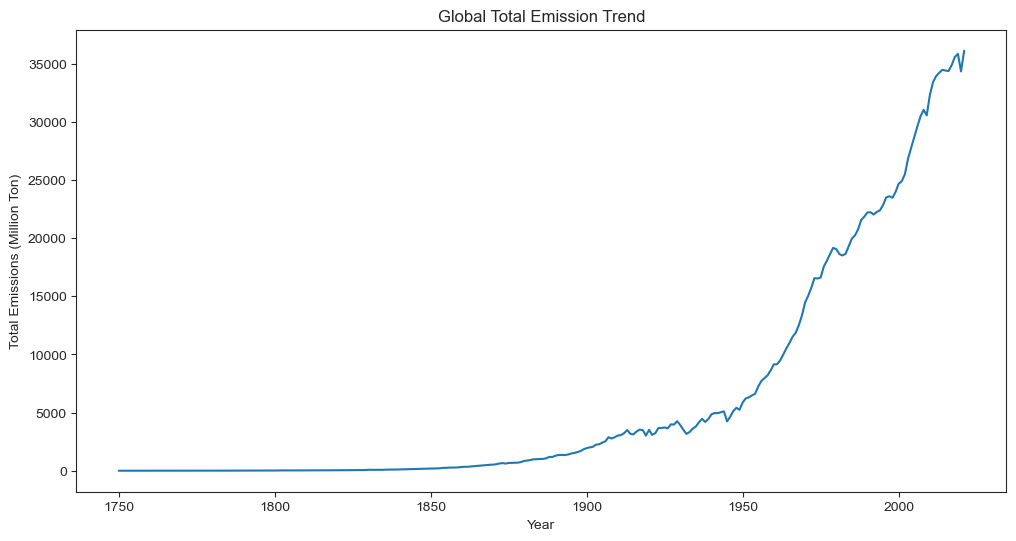

In [26]:
# plot the trend of global total emission change
plt.figure(figsize=(12,6))
sns.set_style("white")
#sns.despine(top=True, right=True)
plt.tick_params(left=True, bottom=True)
sns.lineplot(x='Year',y='Global Total',data=emission_globe)
plt.title("Global Total Emission Trend")
plt.ylabel("Total Emissions (Million Ton)")

This graph illustrates the evolution of global total emissions from 1750 to 2021. The emission evolution can be broadly categorized into five distinct stages:

- **Stage 1 (1750-1850)**: During this period, CO2 emissions remained close to zero with minimal increment over time.

- **Stage 2 (1850-1900)**: This phase witnessed a gradual but steady increase in emissions, with a noticeable acceleration in the rate of increase.

- **Stage 3 (1900-1950)**: In this stage, emissions continued to increase, albeit at a slower pace compared to the previous stage, with values showing significant fluctuations.

- **Stage 4 (1950-1980)**: The period marked a rapid growth in emissions, characterized by a steep upward trajectory.

- **Stage 5 (1980-2021)**: Similar to the previous stage, this phase also experienced rapid growth, albeit with a slightly slower pace compared to Stage 4.

Using the variables year and total emission, this graph demonstrates the historical patterns and trends of CO2 emissions, aiding in the formulation of strategies for addressing current and future challenges related to climate change.

Intuitively, events of significant historical importance often correlate with substantial shifts in emission levels.

[**First Industrial Revolution**](https://en.wikipedia.org/wiki/Industrial_Revolution), occurred during the period from around **1760 to 1840**, was a period of transitioning from agriculture to manufacturing processes. This transition included the increasing use of waterpower and steam power, and the ever-increasing burning of coal starts the CO2 emission history of humanity.

During the [**Second Industrial Revolution**](https://en.wikipedia.org/wiki/Second_Industrial_Revolution), which commenced in the 1870s and extended into the 20th century, significant advancements in manufacturing and production technology transformed societies worldwide. This period witnessed the widespread adoption of revolutionary technological systems, including telegraph and railroad networks. Moreover, novel systems like electrical power emerged, marking a pivotal shift in energy consumption patterns.

However, the widespread adoption of these technological systems necessitated the combustion of coal for energy generation. Consequently, this reliance on coal-powered energy sources led to a steady acceleration in CO2 emissions, as depicted by the graph. This trajectory reflects the increasing demand for energy and the corresponding environmental impact, highlighting the complex interplay between technological progress and environmental consequences during this transformative era.

Between 1900 and 1950, the world witnessed the upheaval of two global conflicts: [**World War I**](https://en.wikipedia.org/wiki/World_War_I) and [**World War II**](https://en.wikipedia.org/wiki/World_War_II). Despite the chaos and instability wrought by these conflicts, the overall trajectory of CO2 emissions continued to ascend. The period was characterized by significant fluctuations in emissions levels, yet the overarching trend remained one of steady increase.

In 1950, a pivotal moment occurred with the onset of the [**Third Industrial Revolution**](https://en.wikipedia.org/wiki/Digital_Revolution), which spanned several decades. This era was marked by the widespread adoption and proliferation of digital technologies, including digital computers and digital record-keeping systems. It served as a transformative turning point, ushering in a notable surge in emissions levels and a record-breaking pace of increment. The advent of digital technologies revolutionized various industries, significantly impacting energy consumption patterns and contributing to the accelerated growth of CO2 emissions.

The surge in emissions observed during Stage 4 continued into the 21st century, as evidenced by the graph, albeit with a slight decrease in the rate of increment. A notable occurrence in Stage 5 was the sudden drop in emissions in the year 2020, coinciding with the outbreak of the [**COVID-19 pandemic**](https://en.wikipedia.org/wiki/COVID-19_pandemic). This unprecedented global event led to widespread lockdowns, travel restrictions, and economic slowdowns, resulting in a significant reduction in human activity and industrial production. Consequently, there was a sharp decline in CO2 emissions during this period, underscoring the profound impact of external events on global emission trends.

However, this period also marks the implementation of the Kyoto Protocol and Paris Agreement, yet the global trend of emission growth shows no signs of abating.

In [27]:
emission_country_total_simplified = emission_country_total[:10]
rest = emission_country_total["Country Total"][101:].sum()
new_row = pd.DataFrame({"Country": ["Rest of the World"], "Code": ["ROW"], "Country Total": [rest]})
emission_country_total_simplified = pd.concat([emission_country_total_simplified, new_row], ignore_index=True)

Text(0, 0.5, 'Total Emissions (Million Ton)')

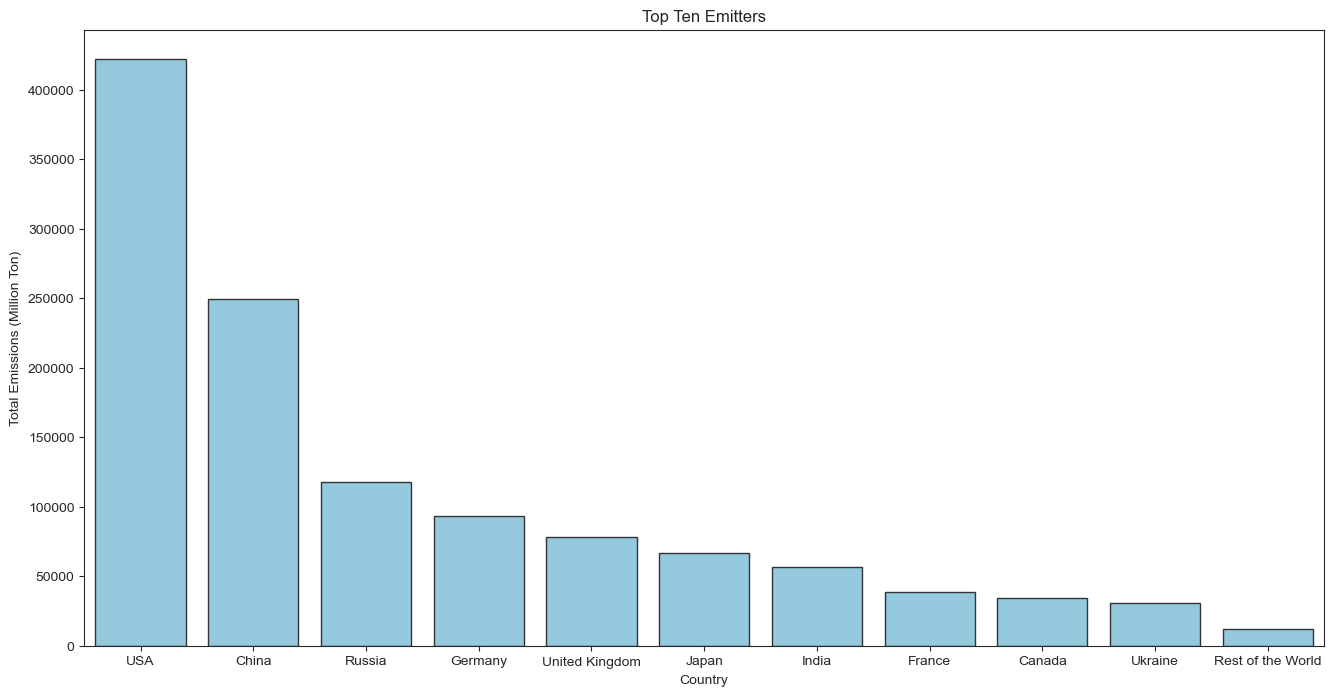

In [28]:
# plot the bar chart showing the total historical emissions rank
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.set_style("white")
plt.tick_params(left=True, bottom=True)
#sns.despine(top=True, right=True)
sns.barplot(x=list(emission_country_total_simplified["Country"]),y=list(emission_country_total_simplified["Country Total"]),palette=['skyblue'],edgecolor='.2')
plt.title("Top Ten Emitters")
plt.xlabel("Country")
plt.ylabel("Total Emissions (Million Ton)")

Utilizing total emissions, we can create a bar chart, as depicted above. The graph highlights the dominant positions of the USA and China as leading contributors to CO2 emissions. Specifically, the USA's emissions surpass China's by a factor of 1.7, underscoring its significant contribution to global emissions. Moreover, China's emissions exceed those of Russia by more than double.

This pattern suggests that the emission levels of countries are not solely determined by their level of development. Instead, factors such as the size of the manufacturing industry and the extent of territorial landmass may play pivotal roles in shaping emission levels. This nuanced understanding underscores the multifaceted nature of emissions dynamics, beyond simplistic categorizations based solely on a country's developmental status.


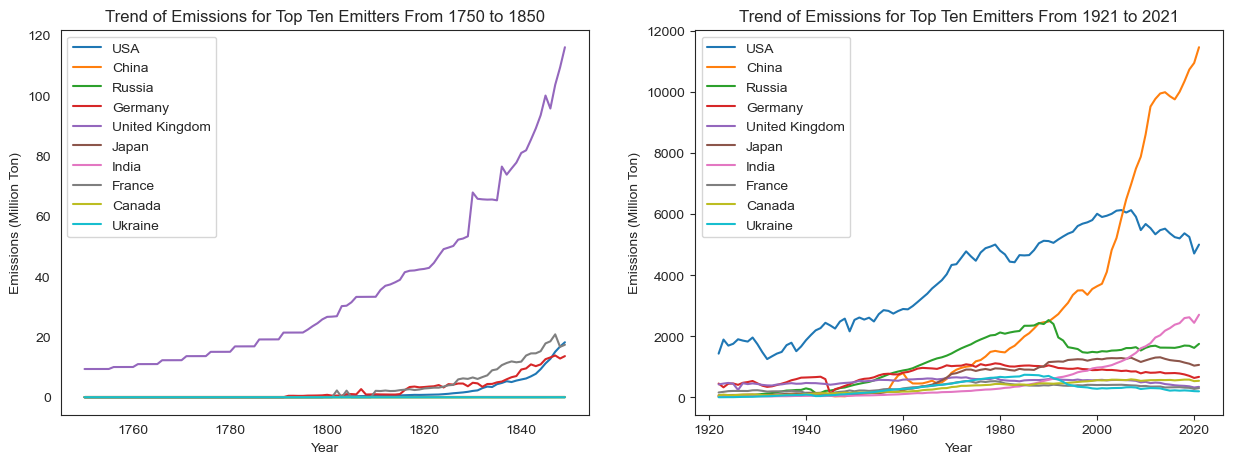

In [29]:
#plot the more detailed graph, for the first 100 years and last 100 years
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
columns = list(emission_country_total["Country"])[:10]

sns.set_style("white")
plt.tick_params(left=True, bottom=True)

for country in columns:
    axes[0].plot(list(emission_country["Year"])[:100], list(emission_country[country])[:100], label=country)

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Emissions (Million Ton)')
axes[0].set_title('Trend of Emissions for Top Ten Emitters From 1750 to 1850')
axes[0].legend()

for country in columns:
    axes[1].plot(list(emission_country["Year"])[-100:], list(emission_country[country])[-100:], label=country)

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Emissions (Million Ton)')
axes[1].set_title('Trend of Emissions for Top Ten Emitters From 1921 to 2021')
axes[1].legend()

Examine the emission growth trend for each country:

**USA**:

- In **1924**, there was a sudden decrease in emissions. This drop can be attributed to the implementation of the Clean Air Act of 1923, which aimed to regulate industrial emissions and improve air quality by imposing restrictions on pollutant emissions from factories and power plants.

- Between **1970 and 1980**, there was no growth in emissions. The Clean Air Act Amendments enacted in 1970 imposed stricter regulations on emissions from industrial sources, automobiles, and power plants. By 1980, these regulations should have been fully implemented. Additionally, in the early 1980s, there was an economic recession in the US, causing plants to shut down and energy demand to fall, which always lead to fall in emissions.

- In **2008**, there was a noticeable decrease in emissions. The global financial crisis of 2008 resulted in a significant economic downturn, leading to reduced industrial activity, decreased energy consumption, and consequently lower emissions. Concerning the economic pressure and the effects of global warming, there were more investments in energy-efficient technologies, and people started transitioning to cleaner energy sources, all of which could potentially contribute to the decrease in emissions.

**China**:

- Emissions began to rise rapidly in **1949**, coinciding with the establishment of the People’s Republic of China. The government initiated policies aimed at rapid industrial growth and modernization, leading to the development of heavy industries, manufacturing plants, and infrastructure projects. This rapid industrialization resulted in increased energy consumption, primarily fueled by coal, a major source of CO2 emissions.

- There is notable spike starting in **2000**, driven by unprecedented economic growth and a significant expansion in industrial production, construction, and infrastructure development. As economic prosperity led to income growth, there was a surge in demand for vehicles, further exacerbating pollution levels. Additionally, the lack of stringent environmental regulation policies in the 2000s allowed industries to operate with few restrictions, contributing to the escalating emissions.

**Russia**:

- In the **1940s**, during World War II, the Soviet Union experienced a significant increase in industrial activity to support the war effort. Industries such as manufacturing, mining, and energy production expanded rapidly to meet the demands of wartime production. This expansion led to a surge in energy consumption and emission levels. 

- From **1940 to 1991**, during the Cold War era, there was a focus on military buildup and industrial expansion in the Soviet Union. The government invested heavily in heavy industries, such as steel, chemicals, and machinery, to enhance national security and maintain military parity with Western powers. The constant increasing trend of energy demand and emission level are the results of such emphasis.

- **1991** emission decline can be attributed to the collapse of the Soviet Union and the subsequent economic transition in Russia. Following the dissolution of the Soviet Union in 1991, Russia underwent a period of economic turmoil and restructuring. The transition from a centrally planned economy to a market-based system led to a decline in industrial output and energy consumption. Thus, the country is burning less coal and emitting less CO2.

**Germany**:

- The drop in emissions in **1945** was a direct result of the aftermath of World War II. The entire country was facing a state of collapse, characterized by widespread destruction of plants and infrastructure, and a severe shortage of labor in manufacturing. Consequently, the decline in manufacturing activity and reduced demand for energy led to a significant decrease in emissions. As industries began the process of restoration and reconstruction, there was a gradual increase in CO2 emissions reflected in the graph. 

**UK**:

- From **1750 to 1850**, the first industrial revolution took place in the UK. During this period, coal served as the lifeblood of the steam engine, becoming a necessity in manufacturing. The ever-high demand and consumption of coal generated CO2 emissions more than the sum of the rest of the world’s emission amount.

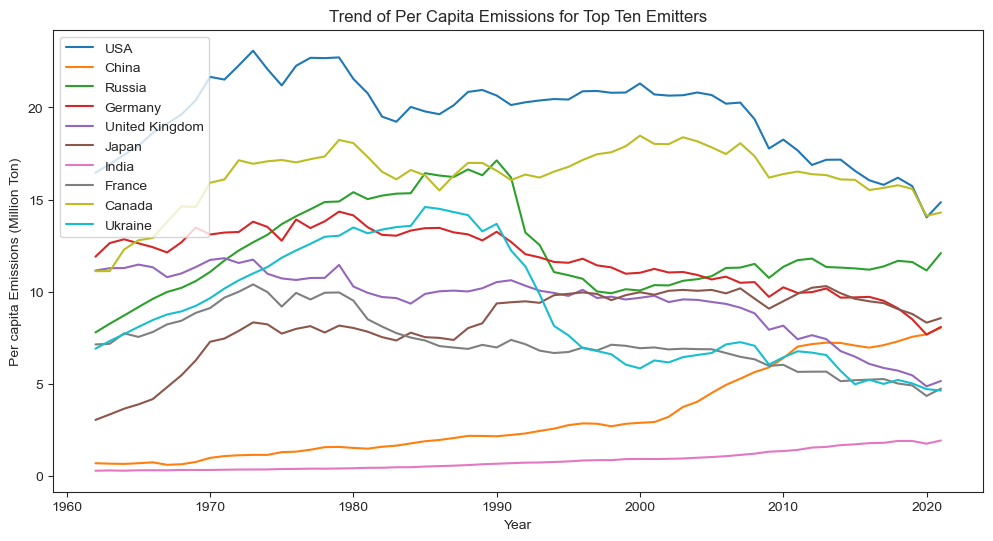

In [30]:
# plot the trend for top ten
columns = list(emission_country_total["Country"])[:10]

fig, ax = plt.subplots(figsize=(12, 6))

sns.set_style("white")
plt.tick_params(left=True, bottom=True)
#sns.despine(top=True, right=True)

for country in columns:
    ax.plot(emission_country_percapita["Year"][-60:], emission_country_percapita[country][-60:], label=country)
    

ax.set_xlabel('Year')
ax.set_ylabel('Per capita Emissions (Million Ton)')
ax.set_title('Trend of Per Capita Emissions for Top Ten Emitters')
ax.legend()

However, upon examining the emission per capita, a similar pattern emerges compared to the visualization presented earlier. The difference is that despite China and India experiencing accelerating emission levels, their emission per capita remains generally lower than that of the developed countries like USA and Canada, even after the emission levels of those developed countries have decreased over a span of 30 years. This observation suggests a potentially high correlation between emission per capita levels and GDP per capita.

This pattern indicates a trend where emission per capita decreases for developed countries but increases for developing ones following the implementation of the Kyoto Protocol and Paris Agreements, aligns with my hypothesize that the effectiveness of these agreements may be undermined in less developed countries.

# Project 2

## 2.1 The Message

Although global agreements like the Paris Agreement and the Kyoto Protocol aim to compel nations to enact policies to mitigate CO2 emissions, these efforts can face challenges when juxtaposed with the pressing need for economic development in developing nations. Furthermore, their effectiveness may be predominantly observed in developed countries and undermined in developing countries and least developed countries.

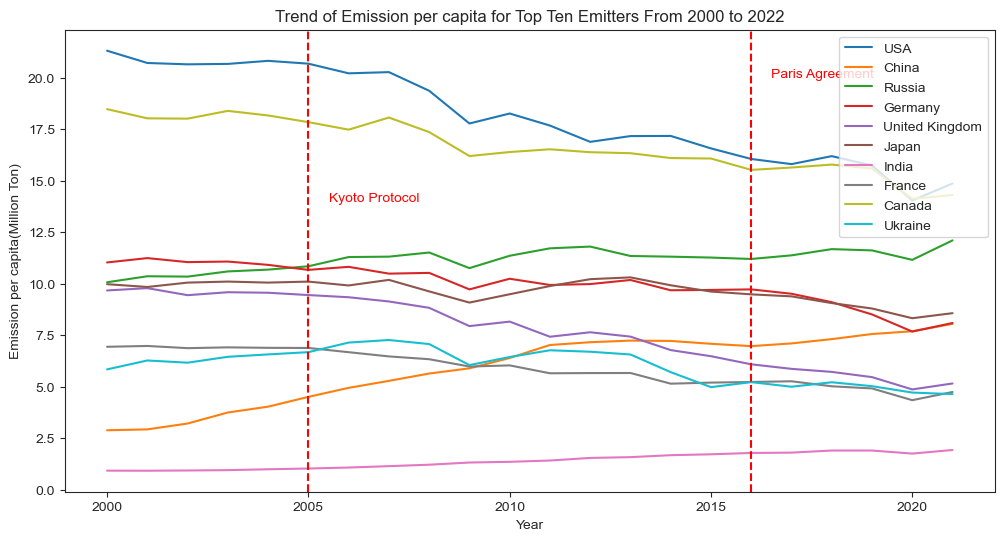

In [31]:
emission_country_around2015 = emission_country_percapita[emission_country_percapita["Year"] > 1999]
# plot the trend for top ten
columns = list(emission_country_total["Country"])[:10]
columns1 = list(emission_country_total["Country"])[2:10]

fig, ax = plt.subplots(figsize=(12, 6))

sns.set_style("white")
ax.tick_params(left=True, bottom=True)
ax.tick_params(left=True, bottom=True)
#sns.despine(top=True, right=True)

for country in columns:
    ax.plot(emission_country_around2015["Year"], emission_country_around2015[country], label=country)
    
    
ax.axvline(x=2005, color='red', linestyle='--')
ax.axvline(x=2016, color='red', linestyle='--')
ax.text(2005.5, 14, 'Kyoto Protocol', color='red')
ax.text(2016.5, 20, 'Paris Agreement', color='red')

ax.set_xlabel('Year')
ax.set_ylabel('Emission per capita(Million Ton)')
ax.set_title('Trend of Emission per capita for Top Ten Emitters From 2000 to 2022')
ax.legend()

The two most recent global accords aimed at curtailing carbon emissions are the Paris Agreement and the Kyoto Protocol.

Established in 1997 and enacted on 16 February 2005, the [**Kyoto Protocol**](https://unfccc.int/kyoto_protocol), under the leadership of Japan, garnered significant participation from European Union member states, Canada, and other nations. As of 2020, 197 parties were signatories to the protocol. Its core objective is to operationalize the United Nations Framework Convention on Climate Change (UNFCCC) by obliging industrialized countries and economies in transition to curtail and diminish greenhouse gas (GHG) emissions in alignment with predefined individual targets.

The [**Paris Agreement**](https://unfccc.int/process-and-meetings/the-paris-agreement?gad_source=1&gclid=Cj0KCQiA84CvBhCaARIsAMkAvkLjitTSzLDZaS2-UAky2aqwMSpaV4s6ApR0NdTfnB7vhZDLWC6QKYAaAvr3EALw_wcB), endorsed by 196 Parties at the UN Climate Change Conference (COP21) on 12 December 2015 and implemented on 4 November 2016, owes its development to substantial contributions from the United States, China, and European Union member states. Its overarching aim is to restrain the global average temperature increase to well below 2°C above pre-industrial levels, with efforts directed towards limiting the increase to 1.5°C above said levels, as outlined by the UNFCCC. Ideally, a deceleration in the rate of CO2 emissions has been observable since 2005, with a further decline noted in 2016.

The accompanying graph illustrates the evolution of emission per capita for the top ten emitters worldwide from 2000 to 2022. Notably, the red lines denote the inception of the Kyoto Protocol and the Paris Agreement, respectively. The empirical data underscores a discernible reduction in CO2 emissions for countries such as the USA, Germany, and Japan, juxtaposed with a continued escalation in emissions from nations like China and India. This dichotomy suggests that the efficacy of regulatory frameworks may hinge upon a nation's level of development, proving efficacious in industrialized nations while potentially lacking effectiveness in developing countries. Subsequent research endeavors will aim to substantiate this conjecture and elucidate its implications further.

## 2.2 Merging with a New Dataset 

The primary sources of CO2 emissions encompass coal, oil, and gas, which are predominantly utilized for generating electricity and other forms of power. Given that these power sources are integral to fueling the industrialization processes within a nation, it is reasonable to posit that an upsurge in CO2 emission levels is concomitant with the expansion of manufacturing industries and overall economic growth, often manifesting in the Gross Domestic Product (GDP) per capita growth rate.

In seeking to identify the underlying reasons for the ineffectiveness of policies within developing countries, it is pertinent to take cognizance of their characteristic high GDP per capita growth rates.

Here, I imported the GDP per capita data of all countries from the [**World Bank**](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG) national account data.

In [32]:
gdp_percapita_year = pd.read_csv("gdp_per_capita.csv")
gdp_percapita_year = gdp_percapita_year.dropna()
gdp_percapita_year = pd.merge(country_code, gdp_percapita_year, on = ['Code'], how = 'inner')

Converting the data into the same form as the original emission dataset.

In [33]:
data_list = []
for index in range(183):
    for year in range(2000, 2021):
        code = gdp_percapita_year['Code'][index]
        value = gdp_percapita_year.loc[index, str(year)]
        new_row_data = {'Code': code, 'Year': int(year), 'GDP per capita': value}
        data_list.append(new_row_data)
gdp_percapita = pd.DataFrame(data_list)
gdp_percapita = pd.merge(country_code, gdp_percapita, on='Code', how='inner')

Merging with the original dataset:

In [34]:
gdp_emission = pd.merge(emission_percapita, gdp_percapita, on=['Country', 'Code', 'Year'], how='inner')
gdp_emission.head()

Country Code  Year  Per Capita  GDP per capita
0  Albania  ALB  2000    0.950630     1126.683340
1  Albania  ALB  2001    1.021259     1281.659826
2  Albania  ALB  2002    1.200003     1425.124219
3  Albania  ALB  2003    1.391371     1846.120121
4  Albania  ALB  2004    1.363761     2373.581292

## 2.3 Maps and Interpretations

In [35]:
#! pip install -q qeds fiona geopandas  gensim folium pyLDAvis descartes

In [36]:
#! pip install -q bokeh

In [37]:
#import world
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_geometry = pd.DataFrame()
world_geometry["Country"] = world["name"]
world_geometry["Code"] = world["iso_a3"]
world_geometry["geometry"] = world["geometry"]
world_geometry = gpd.GeoDataFrame(world_geometry, geometry="geometry")

without_antarctica_w = world["continent"] != "Antarctica"
world = world[without_antarctica_w]
warnings.filterwarnings('ignore', category=FutureWarning)

In [38]:
emission_country_percapita_aft2000 = emission_country_percapita[emission_country_percapita["Year"] >= 2000]
emission_country_percapita_aft2000 = emission_country_percapita_aft2000.set_index("Year")
emission_country_percapita_aft2000 = emission_country_percapita_aft2000.transpose()
emission_country_percapita_aft2000 = emission_country_percapita_aft2000.reset_index()
emission_country_percapita_aft2000 = pd.merge(emission_country_percapita_aft2000, country_code, left_on = "index", right_on = "Country")
emission_country_percapita_aft2000 = pd.DataFrame(emission_country_percapita_aft2000)
without_antarctica_eca = emission_country_percapita_aft2000["Country"] != "Antarctica"
emission_country_percapita_aft2000 = emission_country_percapita_aft2000[without_antarctica_eca]

In [39]:
emission_country_percapita40 = pd.DataFrame()
emission_country_percapita40["Country"] = emission_country_percapita_aft2000["Country"]
emission_country_percapita40["Code"] = emission_country_percapita_aft2000["Code"]
emission_country_percapita40["2005"] = emission_country_percapita_aft2000[2005]
emission_country_percapita40["2010"] = emission_country_percapita_aft2000[2010]
emission_country_percapita40["2015"] = emission_country_percapita_aft2000[2015]
emission_country_percapita40["2020"] = emission_country_percapita_aft2000[2020]
emission_country_percapita40 = pd.merge(emission_country_percapita40, world_geometry, on="Code")
emission_country_percapita40 = gpd.GeoDataFrame(emission_country_percapita40, geometry="geometry")

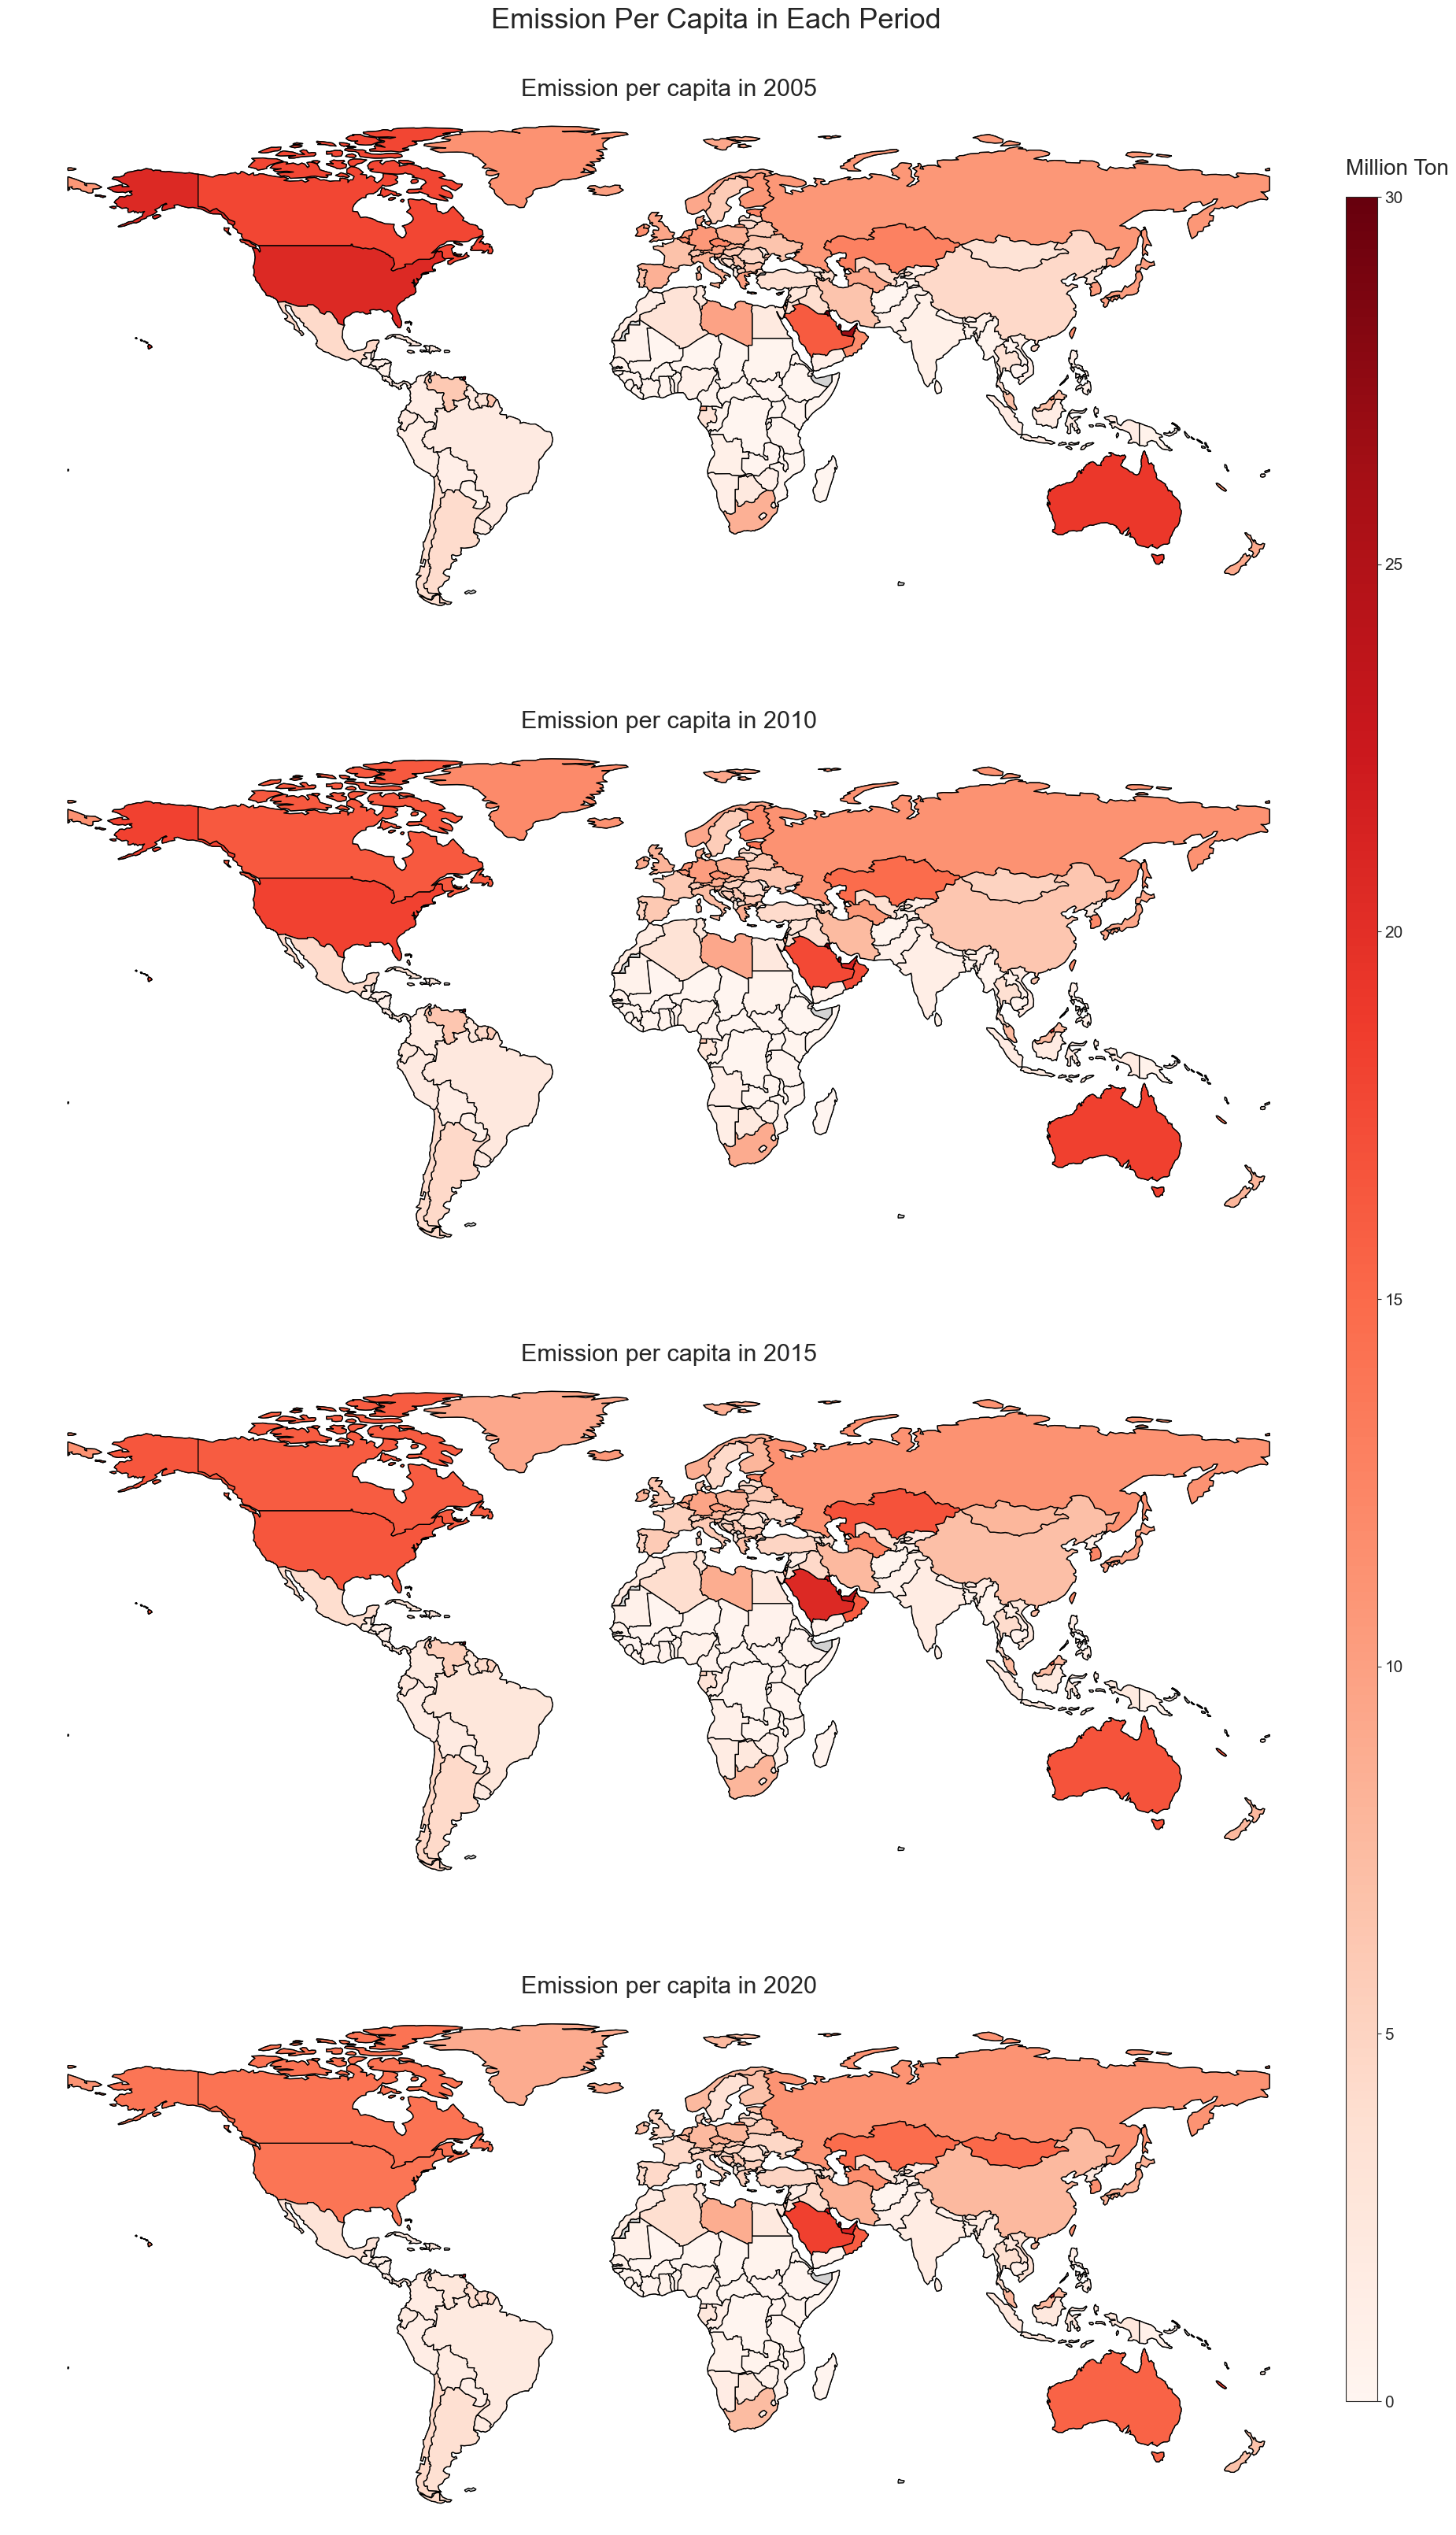

In [40]:
fig, axes = plt.subplots(nrows=4, figsize=(80, 40))
list_data2_0120 = ["2005", "2010", "2015", "2020"]
list_title_0120 = ['Emission per capita in 2005', 'Emission per capita in 2010', 'Emission per capita in 2015', 'Emission per capita in 2020']

plt.suptitle('Emission Per Capita in Each Period', fontsize=26, x = 0.52, y=0.91)

# Plot your data on each axis
for i, ax in enumerate(axes.flat):
    world.plot(ax=ax, color='lightgrey', edgecolor='black')
    # Plot each map on a separate axis (you need to replace this with your actual plotting code)
    emission_country_percapita40.plot(ax=ax, edgecolor='black', column=list_data2_0120[i], cmap='Reds',
                                      vmin=0, vmax=30)
    ax.set_axis_off()
    ax.set_title(list_title_0120[i], fontsize=22)  # Set title for each subplot

cax = fig.add_axes([0.62, 0.15, 0.005, 0.7])  # [left, bottom, width, height]
#two maps: [0.72, 0.15, 0.01, 0.7]

# Add the color bar to the color bar axis
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=30))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

plt.text(0.0001, 30.3, 'Million Ton', fontsize=20)

# Show the plot
plt.show()

This map provides a visual representation of the variations in CO2 emission per capita levels across nations worldwide. The intensity of the red hue indicates the magnitude of emission levels, with darker shades representing higher emissions.

In **2005**, regions in North America prominently display deep shades of red, indicating an average emission of approximately 20 million tons of CO2 per capita. European countries exhibit slightly lower emission levels, averaging around 10 million tons per capita, while other parts of the world are depicted in lighter shades of red.

Following the enactment of the Kyoto Protocol, notable changes occur over the subsequent five years. By **2010**, North American and European nations show lighter shades on the map, indicative of reduced emission levels. This underscores the effectiveness of implemented policies in these regions. Conversely, developing nations such as China and India, despite their protocol membership, demonstrate slightly darker shades.

The period from **2011 to 2015** witnesses a further decline in emission levels across North American and European territories, reflecting the deepening impact of the protocol. However, Canada's withdrawal from the protocol in 2012 results in a marginal uptick in emissions during this timeframe. Meanwhile, China, India, and African countries show no significant changes in CO2 emissions.

Following the implementation of the Paris Agreement in 2016, a positive emission pattern emerges globally. In **2020**, 5 years after the implementation, countries in North and South America, as well as Europe, experience marked decreases in emission levels, leading to an overall reduction in the intensity of the map's red hue.

These visual representations suggest that both the Kyoto Protocol and the Paris Agreement have contributed to mitigating greenhouse gas emissions on a global scale. Nonetheless, it is imperative to acknowledge the influence of various other factors on decreasing in emission levels, with the deceleration of the slowing economic growth emerging as a potential contributing factor.

In [41]:
gdp_percapita_map = pd.DataFrame()
gdp_percapita_map['Country'] = gdp_percapita_year['Country']
gdp_percapita_map['Code'] = gdp_percapita_year['Code']
gdp_percapita_map['2005'] = gdp_percapita_year['2005']
gdp_percapita_map['2010'] = gdp_percapita_year['2010']
gdp_percapita_map['2015'] = gdp_percapita_year['2015']
gdp_percapita_map['2020'] = gdp_percapita_year['2020']
gdp_percapita_map = pd.merge(gdp_percapita_map, world_geometry, on="Code")
gdp_percapita_map = gpd.GeoDataFrame(gdp_percapita_map, geometry="geometry")

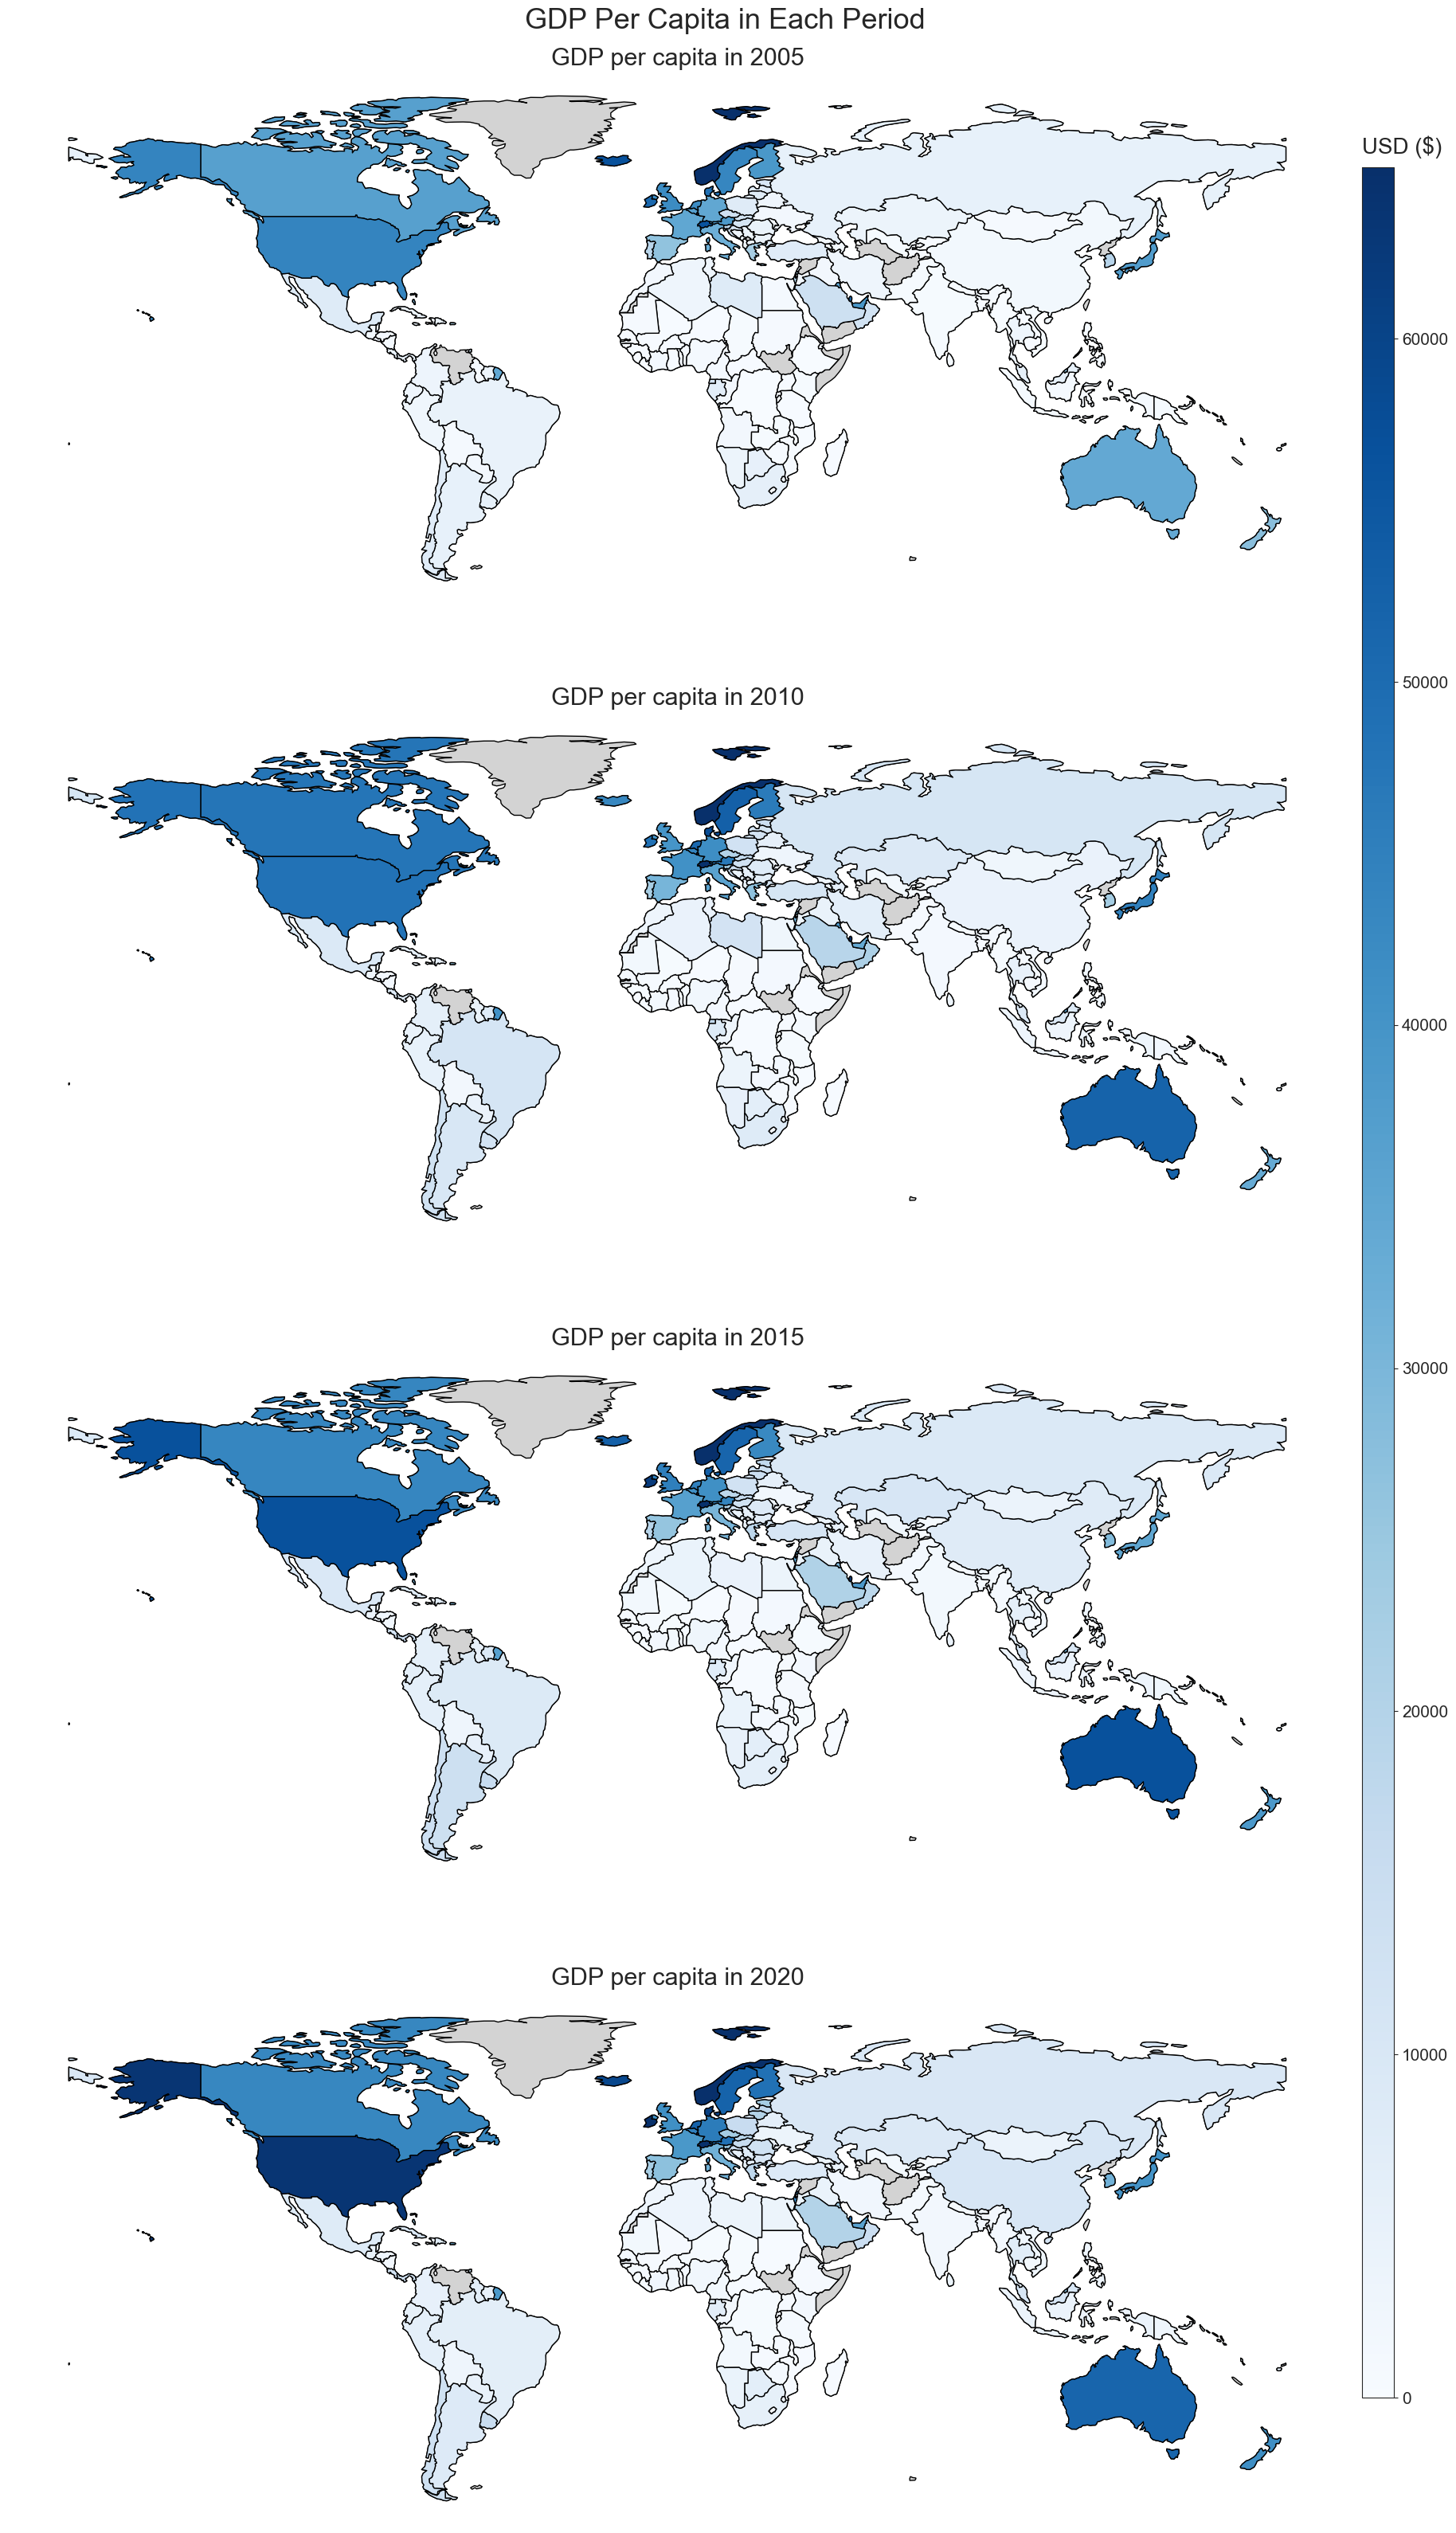

In [42]:
fig, axes = plt.subplots(nrows=4, figsize=(80, 40))
list_gdp_0120 = ["2005", "2010", "2015", "2020"]
list_title_0120 = ['GDP per capita in 2005', 'GDP per capita in 2010', 'GDP per capita in 2015', 'GDP per capita in 2020']

plt.suptitle('GDP Per Capita in Each Period', fontsize=26, x=0.52, y=0.9)

# Plot your data on each axis
for i, ax in enumerate(axes.flat):
    world.plot(ax=ax, color='lightgrey', edgecolor='black')
    # Plot each map on a separate axis (you need to replace this with your actual plotting code)
    gdp_percapita_map.plot(ax=ax, edgecolor='black', column=list_gdp_0120[i], cmap='Blues',
                                      vmin=0, vmax=65000)
    ax.set_axis_off()
    ax.set_title(list_title_0120[i], fontsize=22)  # Set title for each subplot

cax = fig.add_axes([0.62, 0.15, 0.005, 0.7])  # [left, bottom, width, height]
#two maps: [0.72, 0.15, 0.01, 0.7]

# Add the color bar to the color bar axis
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=65000))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

plt.text(0.0001, 65400, 'USD ($)', fontsize=20)

# Show the plot
plt.show()

To comprehend the influence of economic growth on emission levels, it is imperative to scrutinize growth patterns, with GDP per capita serving as a crucial metric. The provided maps offer visual representations of GDP per capita levels, employing varying shades of blue to denote the magnitude of GDP, with gray areas indicating missing data.

Across all four maps, a strong correlation between GDP per capita and emission levels is evident. Countries exhibiting high emission levels consistently demonstrate higher GDP per capita, suggesting a positive relationship between these variables.

Over the 20-year period under examination, notable trends emerge. Developed countries generally exhibit stable GDP per capita levels, with the exception of the United States, which demonstrates a significant increase from approximately 45,000 USD to 70,000 USD. Conversely, developing countries, exemplified by China, display more nuanced changes. While the color differentiation may be subtle, careful analysis reveals a substantial increase in GDP per capita from approximately 2,000 USD to 12,000 USD.

Although the rate of change in GDP per capita is higher for developing countries compared to developed ones, the absolute increase in value remains comparatively smaller. Notably, while developing countries experience modest increases in GDP per capita, emission levels continue to rise. In contrast, developed nations exhibit both higher increases in GDP per capita and reductions in CO2 emissions. Aligned with the knowledge that emission reduction always stands in the opposite side of economic growth, this observation reinforces the hypothesis that emission reduction policies are less effective in developing countries.

# Project 3

## 3.1 Potential Data to Scrape

### Carbon Tax

In evaluating the effectiveness of environmental protection policies, it's crucial to assess the efforts made by each country to reduce CO2 emissions. Various factors come into play when analyzing this issue. One key measure is the implementation of carbon taxes, which directly affect the costs for companies emitting CO2 into the atmosphere. By understanding the carbon tax rates in different countries, we can get an idea of how strict their policies are and explore how these policies influence emission levels in different countries, so that the difference between developed countries and developing countries can be revealed.

A potential website for gathering this data is the statistics website provided by the Center for Global Development：

https://www.cgdev.org/cdi?gad_source=1&gclid=CjwKCAjwte-vBhBFEiwAQSv_xaYaTauWLpZo-DqkAoRMeD5kpv3kY6D89qnvRXrQ_V7Q4kHT2L5BHxoCCnIQAvD_BwE#/raw_environment/carbon_pricing/carbon_pricing?utm_source=google&utm_medium=cpc&utm_campaign=cdi_2023

This website maintains records of the carbon pricing in 60 countries across multiple years. Although direct carbon tax rates are not provided, the carbon price, which quantifies the weighted average cost of emitting a ton of CO2, serves as a proxy for policy stringency.

Upon acquiring the carbon price data for multiple countries across each year, merging it with the emission dataset allows for the creation of comprehensive datasets wherein each row contains both emission levels and corresponding carbon prices for a given country in a specific year. Utilizing techniques such as scatter plot visualization or linear regression analysis with this combined dataset facilitates the examination of how carbon pricing influences emission levels.

### Renewable Energy Production

Another noteworthy variable is the proportion of renewable energy production in the total energy output. Increasing the use of renewable energy sources is widely recognized as an effective means of reducing carbon emissions. However, transitioning from traditional energy sources to renewable ones necessitates substantial investments in research and development, as well as infrastructure construction, both of which incur significant costs. By assessing the extent to which each country relies on renewable energy sources, we can gauge the level of effort dedicated to emission reduction initiatives. Thus, determining how much the effort contribute to emission reduction in each country.

A good website is the “List of countries by renewable electricity production” on Wikipedia: 

https://en.wikipedia.org/wiki/List_of_countries_by_renewable_electricity_production

The website provides a comprehensive table documenting various metrics related to renewable energy production, including the total percentage of energy generated from renewable sources, the corresponding amount in gigawatt hours, and a breakdown of the contribution percentages from different renewable energy sources.

Utilizing this data, the primary focus will be on the total percentage of renewable energy as an independent variable. This metric will be merged with existing emission data, resulting in datasets where each row encompasses emission per capita alongside the corresponding percentage of renewable energy for a specific country in a given year. Subsequently, analyses such as map visualizations, scatter plots, and regression modeling will be conducted to elucidate the relationship between emissions and renewable energy adoption.
Additionally, the percentages generated from different renewable energy sources will be examined to identify the predominant sources utilized globally. This exploration aims to discern which renewable energy sources are most frequently employed and, consequently, ascertain the optimal investment opportunities within the renewable energy sector.

## 3.2 Potential Challenges

During the web scraping process, I encountered several challenges, with the most significant being the failure to extract carbon price data from the targeted website. Despite my initial observation of the presence of a `table` tag in the HTML code while inspecting the website through a browser, subsequent attempts to access the same tag using Python code and `BeautifulSoup` yielded an empty response, rendering the `find_all('table')` function ineffective.

In [43]:
from bs4 import BeautifulSoup

Retrieve the website response with a header, then apply `BeautifulSoup` to organize the response:

In [44]:
#Get the webiste content and use beautiful soup to organize it
web_url = 'https://www.cgdev.org/cdi?gad_source=1&gclid=CjwKCAjwte-vBhBFEiwAQSv_xaYaTauWLpZo-DqkAoRMeD5kpv3kY6D89qnvRXrQ_V7Q4kHT2L5BHxoCCnIQAvD_BwE#/raw_environment/carbon_pricing/carbon_pricing?utm_source=google&utm_medium=cpc&utm_campaign=cdi_2023'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(web_url, headers=headers)
soup_object = BeautifulSoup(response.content)

But the `find_all('table')` function gives an empty list:

In [45]:
soup_object.find_all('table')

[]

This setback prompted a realization of the necessity for advanced scraping techniques to successfully retrieve desired data. Presently, my proficiency in web scraping remains limited to rudimentary methods, and I possess scant knowledge of HTML coding and website design principles. Consequently, there is a recognized need to deepen my understanding of HTML coding, website structure, and Python scripting to overcome such challenges in future scraping endeavors.

While acknowledging that achieving proficiency in these areas will require a substantial investment of time and effort, I firmly believe that the benefits derived from mastering advanced scraping skills outweigh the challenges encountered. Therefore, I am committed to dedicating the necessary resources to acquire the requisite knowledge and skills to ensure more effective and successful scraping endeavors in the future.

One of the challenges I encountered involves sourcing suitable data. For my research topic, essential data such as GDP per capita, population figures, and patent numbers are typically already documented by public organizations like the World Bank or Statista. These datasets are publicly available on their websites and through APIs, allowing me to directly download CSV files. This situation makes it challenging to find data that requires web scraping.

Furthermore, despite the availability of demographic data from sources like the World Bank, there are still numerous missing values. Least developed countries often lack resources to record their population, GDP per capita, and patent numbers before 2000, and sometimes even in recent years. However, since CO2 emissions also occur in these regions, setting null values to zero would compromise the accuracy of my data. Given that these values appear as null in the tables provided by large organizations, it's nearly impossible for me to locate them on websites. Therefore, I've had to relinquish the search for this information and opt to drop countries with missing values instead.

## 3.3 Scraping Data from a Website

Due to the failure of scraping the carbon price data, I only scraped the renewable energy table.

Retrieve the website, then apply `BeautifulSoup` to organize the response:

In [46]:
#Get the webiste content and use beautiful soup to organize it
web_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_renewable_electricity_production'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)

From observing the website structure, the table we want is the first one, so get the table by using ` soup_object.find_all('table')[0]`.

Then examine the rows. Get the first row and observe that all data can be get by applying `.text`. to each table cell.

In [47]:
#Get the table
data_table = soup_object.find_all('table')[0]
#Get each rows
all_values = data_table.find_all('tr')
all_values[1]

<tr>
<td><span class="flagicon"><span typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="885" data-file-width="726" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/16px-Flag_of_Nepal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/25px-Flag_of_Nepal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/33px-Flag_of_Nepal.svg.png 2x" width="16"/></span></span>   </span><a href="/wiki/Nepal" title="Nepal">Nepal</a></td>
<td>100%</td>
<td>11,000</td>
<td>98.7%</td>
<td>0%</td>
<td>1.2%</td>
<td>0.1%</td>
<td>0%
</td></tr>

Then construct the table we want:

1. Create an empty dataframe with columns same as the table on the website.

2. Use loop to examine all rows of the table.

3. Observing that some data are in string format and what we want is number, so remove the `%` sign and convert data into `float`.

4. Add the data into the created dataframe

In [48]:
#Create a new empty dataframe
renewable_energy = pd.DataFrame(columns = ['Country', 'Renewable Energy Percentage', 'Renewable Energy Generagted (GWh)', 'Hydro Percentage', 'Wind Percentage', 'Biomass Percentage', 'Solar Percentage', 'Geothermal Percentage']) 
ix = 0

for row in all_values[1:]:
    values = row.find_all('td') 
    country = values[0].text.strip()
    perc_re = float(values[1].text.replace('%', ''))
    gen = float(values[2].text.replace(',', ''))
    hydro = float(values[3].text.replace('%', ''))
    wind = float(values[4].text.replace('%', ''))
    bio = float(values[5].text.replace('%', ''))
    solar = float(values[6].text.replace('%', ''))
    geo = float(values[7].text.strip().replace('%', ''))
    
    renewable_energy.loc[ix] = [country, perc_re, gen, hydro, wind, bio, solar, geo] # Store it in the dataframe as a row
    ix += 1
    
# Print the first 5 rows of the dataframe
renewable_energy.head()

Country  Renewable Energy Percentage  \
0                                         Nepal                        100.0   
1                                      Ethiopia                        100.0   
2                                        Bhutan                        100.0   
3                                       Albania                        100.0   
4  South Georgia and the South Sandwich Islands                        100.0   

   Renewable Energy Generagted (GWh)  Hydro Percentage  Wind Percentage  \
0                            11000.0              98.7              0.0   
1                            15817.0              94.5              5.2   
2                            10823.0             100.0              0.0   
3                             8963.0              99.5              0.0   
4                                0.8              98.7              1.3   

   Biomass Percentage  Solar Percentage  Geothermal Percentage  
0                 1.2               0.1                    0.0  
1                 0.2               0.1                    0.0  
2                 0.0               0.0                    0.0  
3                 0.5               0.0                    0.0  
4                 0.0               0.0                    0.0

## 3.4 Visualizing the Scraped Dataset

In [49]:
renewable_energy.at[126, 'Country'] =  'USA'
renewable_energy_vis = pd.merge(country_code, renewable_energy, on = 'Country', how='right')
renewable_energy_vis = pd.merge(renewable_energy_vis, world_geometry, on="Code")
renewable_energy_vis = gpd.GeoDataFrame(renewable_energy_vis, geometry="geometry")
renewable_energy_vis['total amount'] = renewable_energy_vis['Renewable Energy Generagted (GWh)'] *100/ renewable_energy_vis['Renewable Energy Percentage']

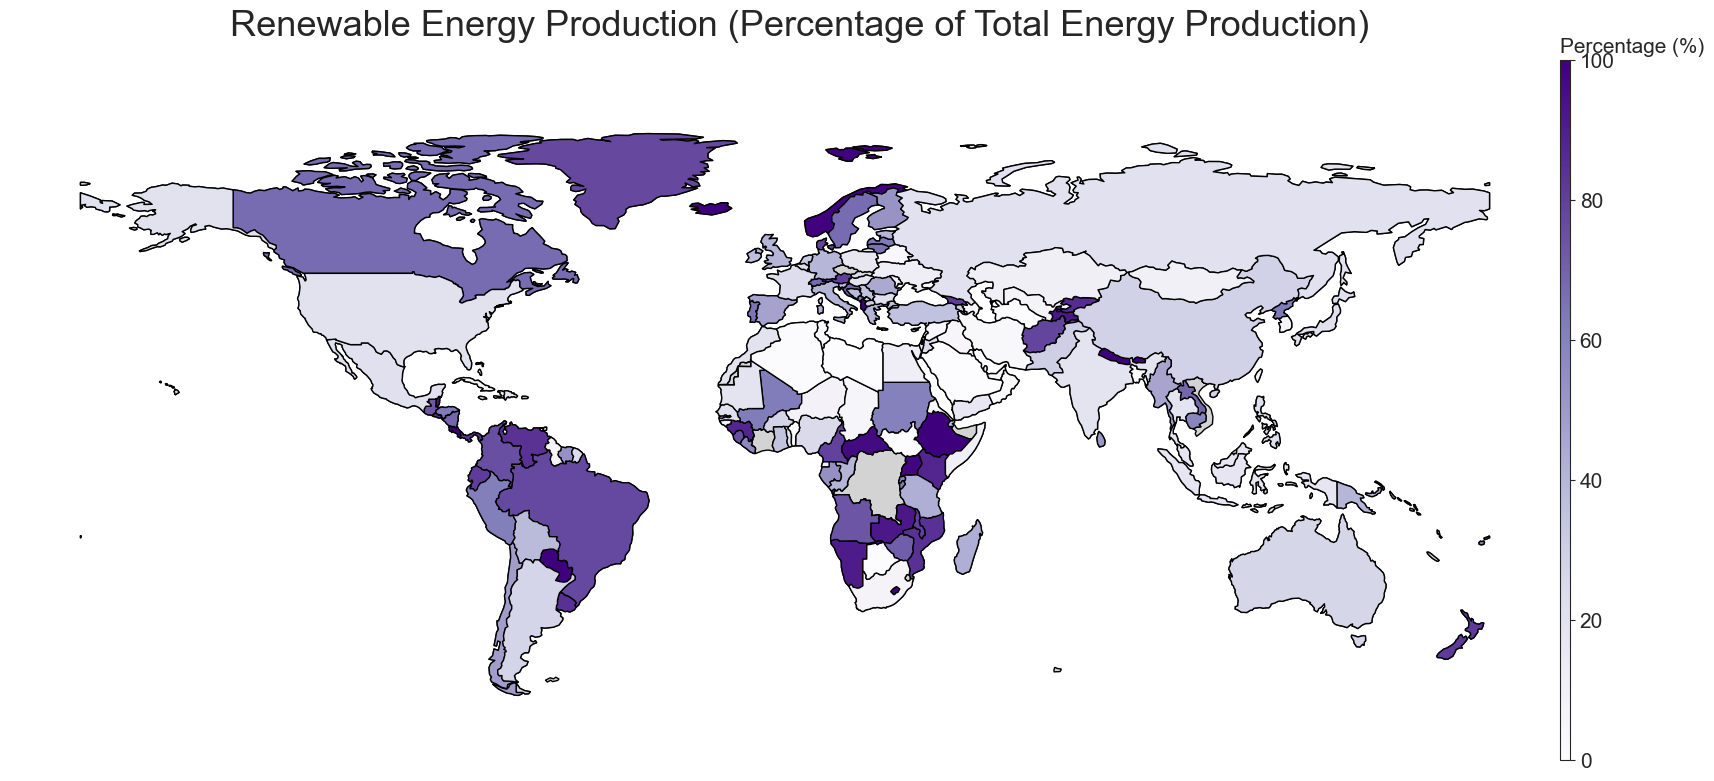

In [50]:
fig, axes = plt.subplots(figsize=(20, 10))

plt.suptitle('Renewable Energy Production (Percentage of Total Energy Production)', fontsize=26, x=0.52, y=0.9)

world.plot(ax=axes, color='lightgrey', edgecolor='black')

renewable_energy_vis.plot(ax=axes, edgecolor='black', column='Renewable Energy Percentage', cmap='Purples',
                                      vmin=0, vmax=100)
axes.set_axis_off()

cax = fig.add_axes([0.90, 0.15, 0.005, 0.7])  # [left, bottom, width, height]
#two maps: [0.72, 0.15, 0.01, 0.7]

# Add the color bar to the color bar axis
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

plt.text(0.0001, 101, 'Percentage (%)', fontsize=15)

# Show the plot
plt.show()

The provided map illustrates the percentage of renewable energy production in total energy production, with varying shades of purple representing different values of this percentage.

A discernible inverse relationship between emission levels and the percentage of renewable energy production is evident from the map. Specifically, countries located in Europe, South America, and Africa consistently exhibit light red colors in the emission map, indicative of lower CO2 emissions. This observation suggests that irrespective of the underlying reasons for the high proportion of renewable energy utilization in these regions, they have effectively managed to reduce their emissions.

Additionally, an observation emerges regarding China's marginally higher reliance on renewable energy sources compared to the United States. Despite this, China has experienced a notable increase in CO2 emissions in recent years, contrasting with the decreasing trend observed in the United States.This pattern suggests that the actual efficacy of transitioning to cleaner energy sources may be less pronounced for China, and by extension, for many developing countries.

In [51]:
emission_country_aft2000 = emission_country[emission_country["Year"] >= 2000]
emission_country_aft2000 = emission_country_aft2000.set_index("Year")
emission_country_aft2000 = emission_country_aft2000.transpose()
emission_country_aft2000 = emission_country_aft2000.reset_index()
emission_country_aft2000 = pd.merge(emission_country_aft2000, country_code, left_on = "index", right_on = "Country")
emission_country_aft2000 = pd.DataFrame(emission_country_aft2000)
without_antarctica_eca = emission_country_aft2000["Country"] != "Antarctica"
emission_country_aft2000 = emission_country_aft2000[without_antarctica_eca]
emission_2021 = pd.DataFrame()
emission_2021['Country'] = emission_country_aft2000['Country']
emission_2021['Code'] = emission_country_aft2000['Code']
emission_2021['Total Emission'] = emission_country_aft2000[2021]
renewable_total = pd.DataFrame()
renewable_total['Code'] = renewable_energy_vis['Code']
renewable_total['Total Energy Produced'] = renewable_energy_vis['total amount'] / 1000
emission_energy = pd.merge(emission_2021, renewable_total, on='Code', how = 'inner')

In [52]:
emission_energy = emission_energy.sort_values(by="Total Emission", ascending=False)
emission_energy

Country Code  Total Emission  Total Energy Produced
1                       China  CHN    11472.369171            8547.335664
0                         USA  USA     5007.335889            4368.926108
6                       India  IND     2709.683625            1630.588542
2                      Russia  RUS     1755.547390            1088.627451
5                       Japan  JPN     1067.398435            1049.900474
..                        ...  ...             ...                    ...
159             Guinea-Bissau  GNB        0.351839               0.028169
158           Solomon Islands  SLB        0.317925               0.106061
157  Central African Republic  CAF        0.227296               0.147150
160                   Vanuatu  VUT        0.174859               0.079365
161               Puerto Rico  PRI        0.000000              19.521739

[162 rows x 4 columns]

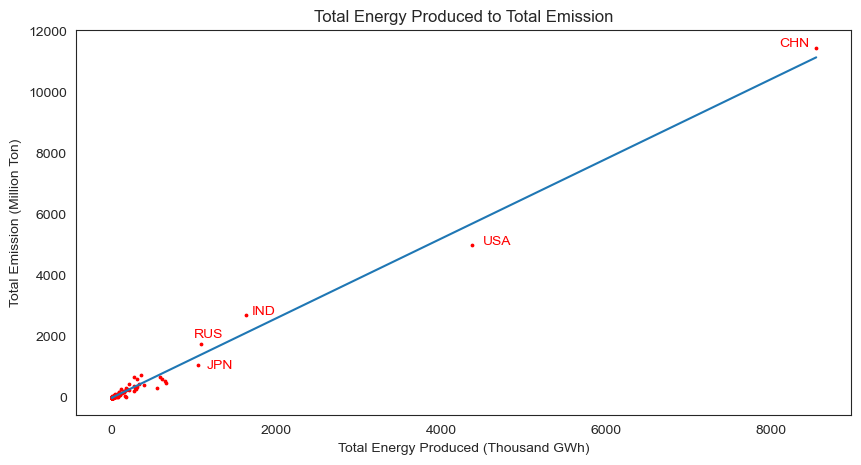

In [53]:
fig, ax = plt.subplots(figsize = (10, 5))

emission_energy.plot(kind = "scatter", x = "Total Energy Produced", y = "Total Emission", ax = ax, s = 3, color = "red")

ax.set_title("Total Energy Produced to Total Emission")
ax.set_xlabel("Total Energy Produced (Thousand GWh)")
ax.set_ylabel("Total Emission (Million Ton)")

x = emission_energy["Total Energy Produced"]
y = emission_energy["Total Emission"]

ax.text(4500, 5000, 'USA', color='red')
ax.text(8100, 11500, 'CHN', color='red')
ax.text(1700, 2700, 'IND', color='red')
ax.text(1000, 1950, 'RUS', color='red')
ax.text(1150, 950, 'JPN', color='red')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x))

From the scraped data, the calculation of total energy production for each country enables the investigation of the relationship between energy generation and emission levels. By plotting a scatter plot with total emissions on the y-axis and total energy production on the x-axis, and fitting a best-fit line, we can visually assess the correlation between these variables.

The absence of outlier points and the observation of a strong positive relationship between total emission and total energy production further support the hypothesis that emission levels are positively proportional to the amount of energy generated. This finding underscores the significance of energy generation as a contributing factor to CO2 emissions, and can be used in later research.

## 3.5 Adding a New Dataset

In addition to the existing variables, several supplementary factors can be incorporated into the research. I have imported datasets containing information on population size, the percentage of manufacturing value added in GDP, the number of renewable energy-related patents, as well as data on the existence of carbon tax and carbon trading systems. These additional variables will enrich the analysis by providing a more comprehensive understanding of the factors influencing emission levels and the efficacy of emission reduction policies.

### Population

The inclusion of population data serves multiple purposes within the research framework. Firstly, it enables the calculation of per capita values for various variables, ensuring comparability with emission per capita and GDP per capita metrics. This facilitates a more comprehensive analysis of emissions and economic indicators across different countries.

Import the dataset:

In [54]:
population_year = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_85.csv")
population_year = population_year.dropna()
population_year = pd.merge(country_code, population_year, on = 'Code', how = 'inner')

Change the structure of the dataset for merging:

In [55]:
for year in range(1960, 2022):
    year_str = str(year)
    population_year = population_year.rename(columns ={year_str: year_str})

In [56]:
population_country = population_year.drop(columns={"Code"})
population_country = population_country.set_index('Country')
population_country = population_country.transpose()
population_country = population_country.reset_index()
population_country = population_country.rename(columns={'index': 'Year'})
population_country['Year'] = [int(x) for x in population_country['Year']]

In [57]:
data_list = []
for index in range(204):
    for year in range(1960, 2023):
        code = population_year['Code'][index]
        value = population_year.loc[index, str(year)]
        new_row_data = {'Code': code, 'Year': int(year), 'Population': value}
        data_list.append(new_row_data)
population = pd.DataFrame(data_list)
population = pd.merge(country_code, population, on='Code', how='inner')

Merge with the dataset with emission per capita and GDP per capita:

In [58]:
population_gdp_emission = pd.merge(gdp_emission, population, on=['Country', 'Code', 'Year'], how = 'inner')
population_gdp_emission = population_gdp_emission.rename(columns={'Per Capita': 'Emission per capita'})
population_gdp_emission.head()

Country Code  Year  Emission per capita  GDP per capita  Population
0  Albania  ALB  2000             0.950630     1126.683340   3089027.0
1  Albania  ALB  2001             1.021259     1281.659826   3060173.0
2  Albania  ALB  2002             1.200003     1425.124219   3051010.0
3  Albania  ALB  2003             1.391371     1846.120121   3039616.0
4  Albania  ALB  2004             1.363761     2373.581292   3026939.0

Visualization:

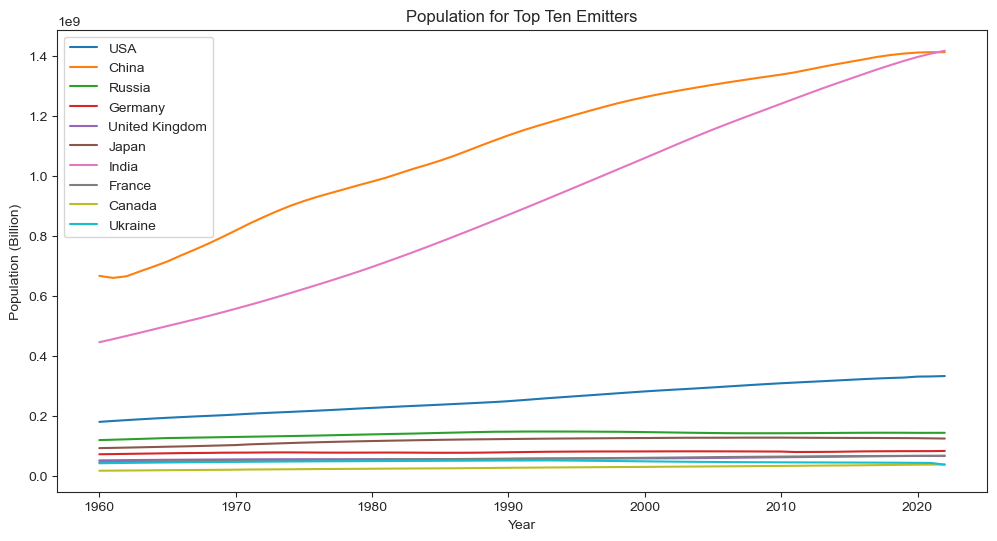

In [59]:
# plot the trend for top ten
columns = list(emission_country_total["Country"])[:10]

fig, ax = plt.subplots(figsize=(12, 6))

sns.set_style("white")
plt.tick_params(left=True, bottom=True)
#sns.despine(top=True, right=True)

for country in columns:
    ax.plot(population_country["Year"], population_country[country], label=country)
    
ax.set_xlabel('Year')
ax.set_ylabel('Population (Billion)')
ax.set_title('Population for Top Ten Emitters')
ax.legend()

Population size may have broader implications beyond numerical values. High population densities could signify greater challenges and costs associated with policy implementation, thereby influencing the effectiveness and feasibility of emission reduction measures. By considering population dynamics alongside other variables, such as policy implementation costs, the research can delve deeper into the nuanced relationships between socio-demographic factors and emission levels.

### Manufacturing Value Added Percentage of GDP

The addition of the manufacturing value added percentage in GDP provides valuable insights into the industrial composition of economies. Manufacturing sectors are often significant contributors to CO2 emissions due to their energy-intensive nature. By incorporating this variable, the research can explore the relationship between industrial activity and emission levels.

Import the dataset:

In [60]:
manufacture_year = pd.read_csv("API_NV.IND.MANF.ZS_DS2_en_csv_v2_7.csv")
manufacture_year = pd.merge(manufacture_year, country_code, on='Code')
manufacture_year.fillna(0, inplace=True)
manufacture_year = manufacture_year.reset_index()

Change the structure of the dataset for merging:

In [61]:
data_list = []
for index in range(205):
    for year in range(2000, 2021):
        code = manufacture_year['Code'][index]
        value = manufacture_year.loc[index, str(year)]
        new_row_data = {'Code': code, 'Year': int(year), 'Manufacture Percentage': value}
        data_list.append(new_row_data)
manufacture = pd.DataFrame(data_list)
manufacture = pd.merge(country_code, manufacture, on='Code', how='inner')

Merge with the dataset with emission per capita, GDP per capita, and population:

In [62]:
#merging with original
manufacture_population_gdp_emission = pd.merge(population_gdp_emission, manufacture, on=['Country', 'Code', 'Year'], how='inner')
manufacture_population_gdp_emission.head(5)

Country Code  Year  Emission per capita  GDP per capita  Population  \
0  Albania  ALB  2000             0.950630     1126.683340   3089027.0   
1  Albania  ALB  2001             1.021259     1281.659826   3060173.0   
2  Albania  ALB  2002             1.200003     1425.124219   3051010.0   
3  Albania  ALB  2003             1.391371     1846.120121   3039616.0   
4  Albania  ALB  2004             1.363761     2373.581292   3026939.0   

   Manufacture Percentage  
0                4.317846  
1                4.099040  
2                4.066543  
3                4.124160  
4                4.177557

Visualization:

In [63]:
manufacture_map = pd.DataFrame()
manufacture_map['Country'] = manufacture_year['Country']
manufacture_map['Code'] = manufacture_year['Code']
manufacture_map['2005'] = manufacture_year['2005']
manufacture_map['2010'] = manufacture_year['2010']
manufacture_map['2015'] = manufacture_year['2015']
manufacture_map['2020'] = manufacture_year['2020']
manufacture_map = pd.merge(manufacture_map, world_geometry, on="Code")
manufacture_map = gpd.GeoDataFrame(manufacture_map, geometry="geometry")

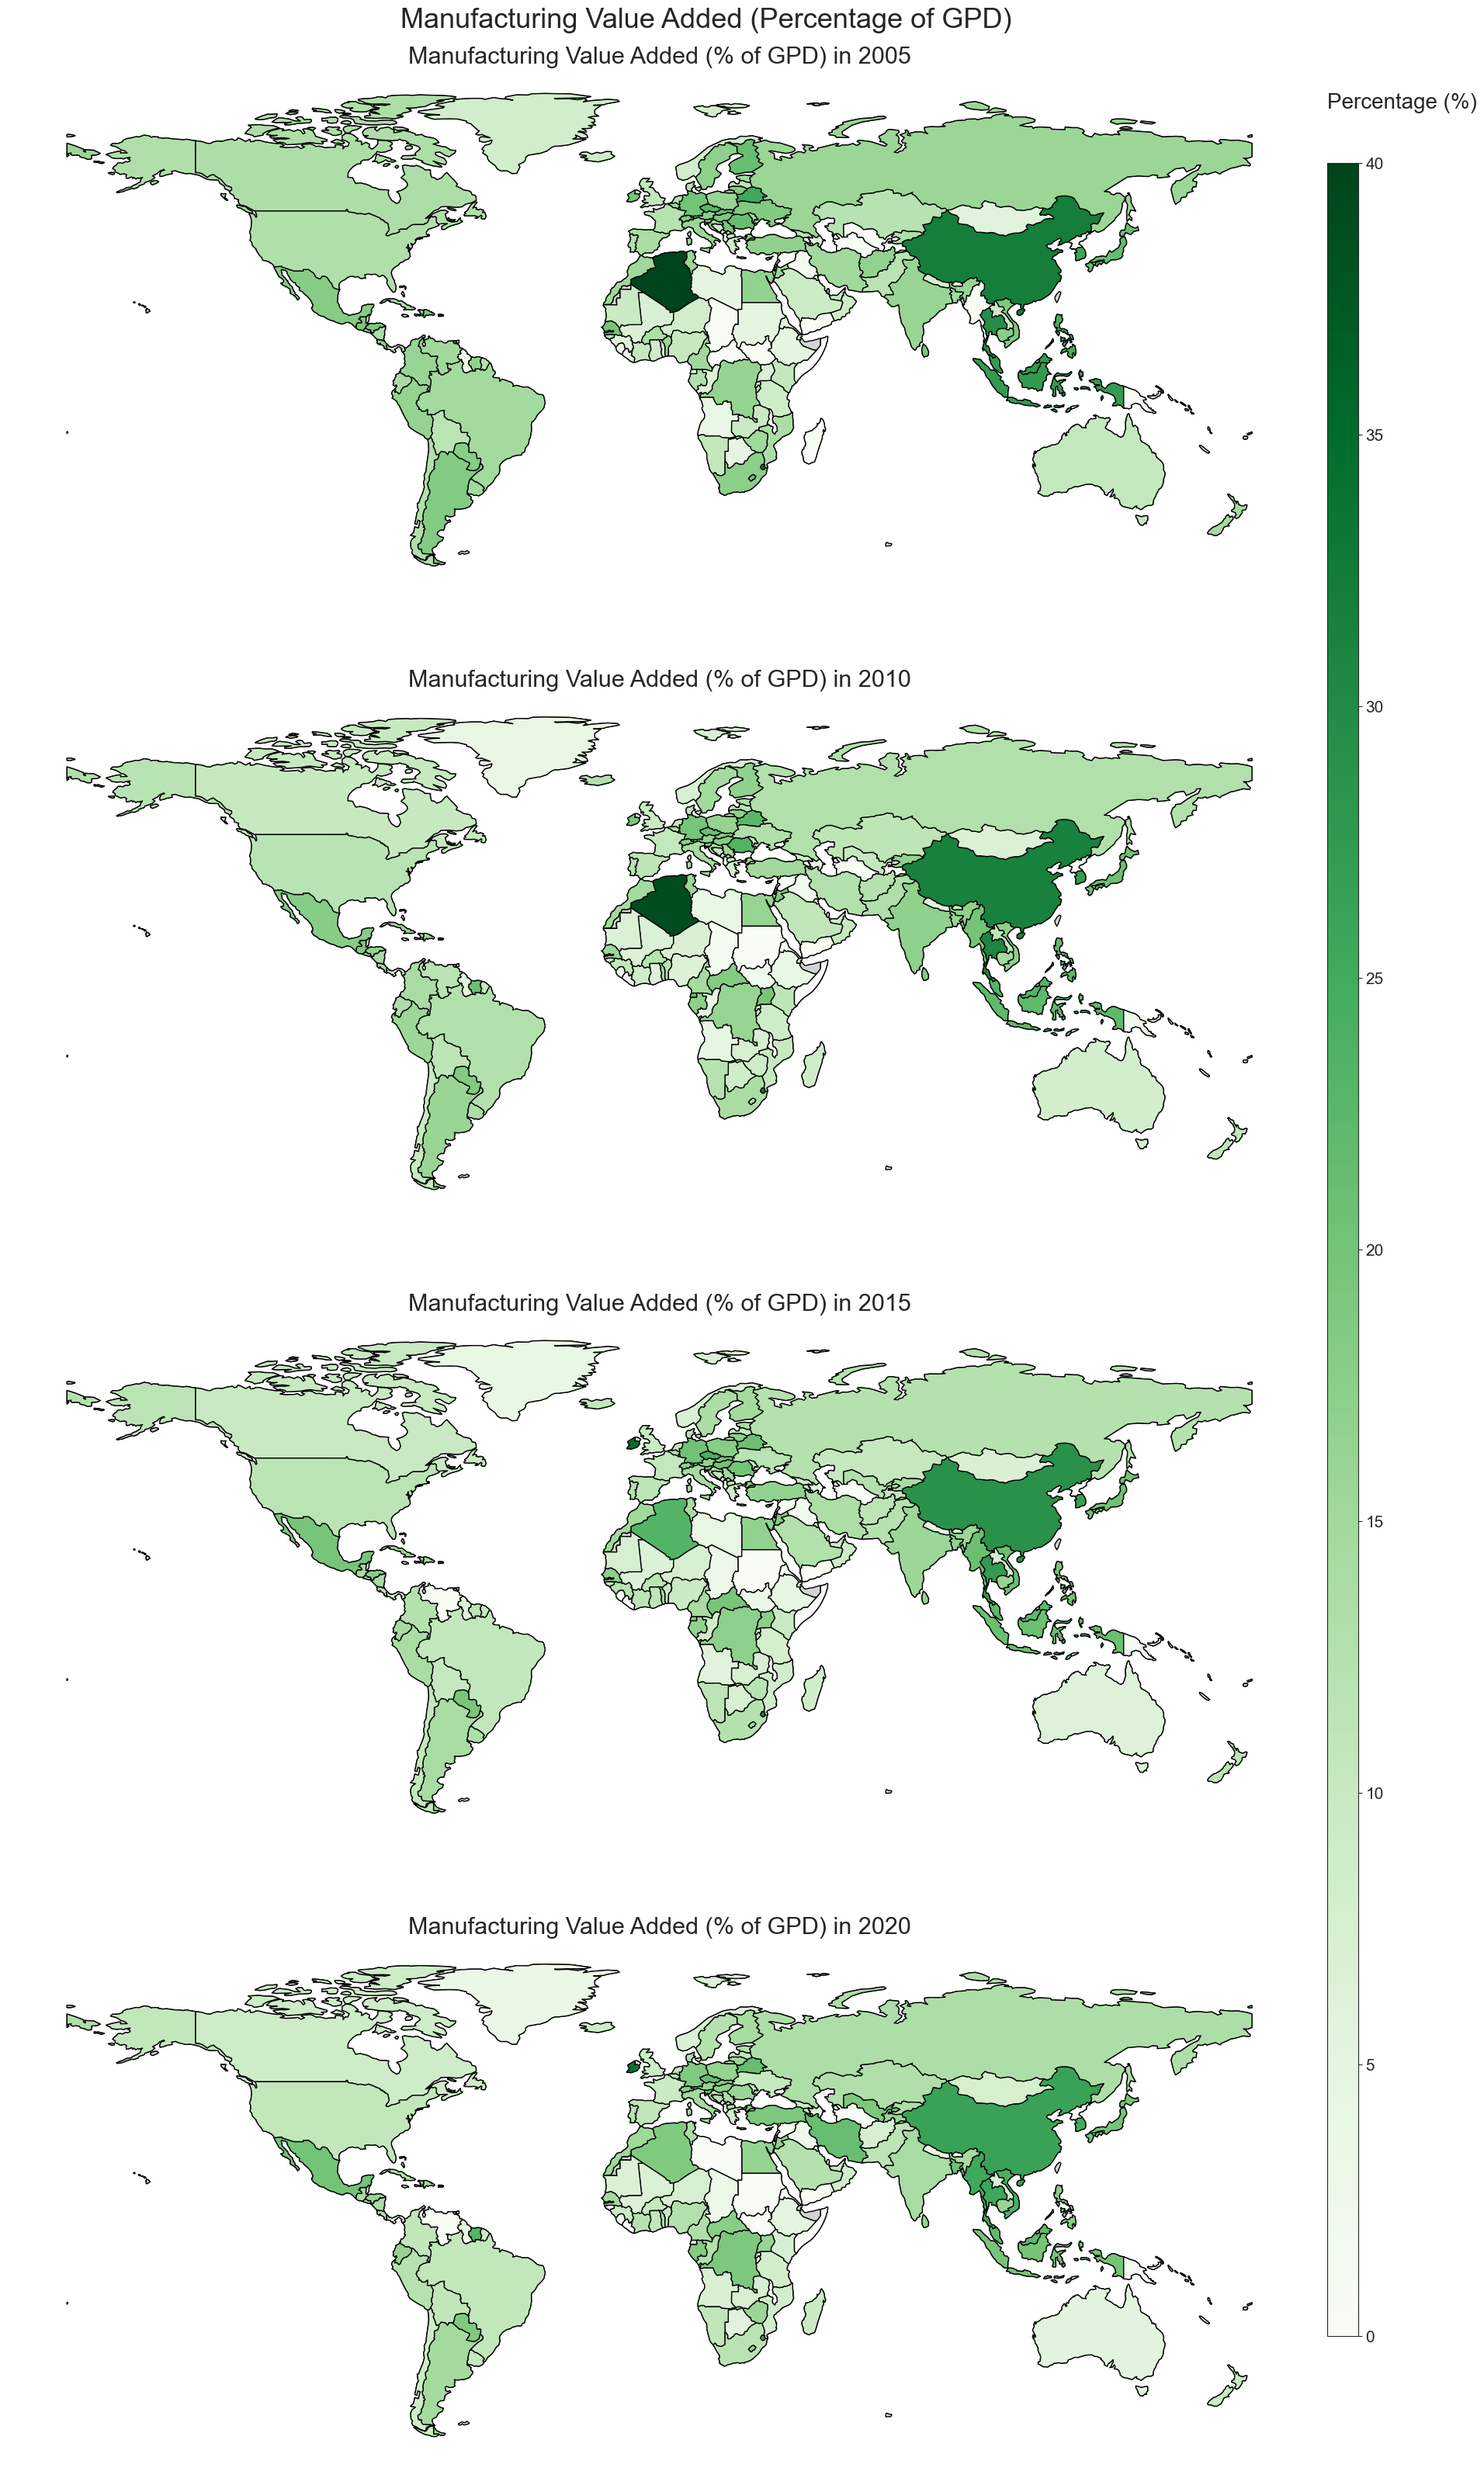

In [64]:
fig, axes = plt.subplots(nrows=4, figsize=(80, 40))
list_gdp_0120 = ["2005", "2010", "2015", "2020"]
list_title_0120 = ['Manufacturing Value Added (% of GPD) in 2005', 'Manufacturing Value Added (% of GPD) in 2010', 'Manufacturing Value Added (% of GPD) in 2015', 'Manufacturing Value Added (% of GPD) in 2020']

plt.suptitle('Manufacturing Value Added (Percentage of GPD)', fontsize=26, x=0.52, y=0.9)

# Plot your data on each axis
for i, ax in enumerate(axes.flat):
    world.plot(ax=ax, color='lightgrey', edgecolor='black')
    # Plot each map on a separate axis (you need to replace this with your actual plotting code)
    manufacture_map.plot(ax=ax, edgecolor='black', column=list_gdp_0120[i], cmap='Greens',
                                      vmin=0, vmax=40)
    ax.set_axis_off()
    ax.set_title(list_title_0120[i], fontsize=22)  # Set title for each subplot

cax = fig.add_axes([0.62, 0.15, 0.005, 0.7])  # [left, bottom, width, height]
#two maps: [0.72, 0.15, 0.01, 0.7]

# Add the color bar to the color bar axis
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=40))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

plt.text(0.0001, 41, 'Percentage (%)', fontsize=20)

# Show the plot
plt.show()

Though the relationship is not obvious in the map, higher percentages of manufacturing value added in GDP may indicate greater industrialization and reliance on energy-intensive production processes. Consequently, countries with a larger share of manufacturing in their GDP may exhibit higher emissions levels. Analyzing this relationship can elucidate the impact of industrial activity on emissions and inform targeted policy interventions aimed at mitigating emissions from manufacturing processes.

### Renewable Energy related Patent Number

Incorporating data on renewable energy-related patents allows me to assess the extent of technological progress and innovation in renewable energy generation and utilization, as the number of patents granted for renewable energy technologies provides a quantitative measure of research and development (R&D) activity and innovation in the field. As countries adopt mature renewable energy technologies, they tend to rely less on traditional methods of electricity generation, thereby reducing emissions.

Import the data and merge with the dataset that has emission per capita, GDP percapita, population, and manufacutre percentage：

In [65]:
patent = pd.read_csv('patents-for-renewables-by-country.csv')
patent = pd.merge(country_code, patent, on = 'Code', how='inner')
patent_manufacture_population_gdp_emission = pd.merge(manufacture_population_gdp_emission, patent, on=['Country', 'Code', 'Year'], how='left')
patent_manufacture_population_gdp_emission['Renewable Energy Patent'].fillna(0, inplace=True)
patent_manufacture_population_gdp_emission['Patent per 1 million Population'] = patent_manufacture_population_gdp_emission['Renewable Energy Patent'] * 1000000 / patent_manufacture_population_gdp_emission['Population']
patent_manufacture_population_gdp_emission = patent_manufacture_population_gdp_emission.drop(columns='Renewable Energy Patent')
patent_manufacture_population_gdp_emission.head()

Country Code  Year  Emission per capita  GDP per capita  Population  \
0  Albania  ALB  2000             0.950630     1126.683340   3089027.0   
1  Albania  ALB  2001             1.021259     1281.659826   3060173.0   
2  Albania  ALB  2002             1.200003     1425.124219   3051010.0   
3  Albania  ALB  2003             1.391371     1846.120121   3039616.0   
4  Albania  ALB  2004             1.363761     2373.581292   3026939.0   

   Manufacture Percentage  Patent per 1 million Population  
0                4.317846                              0.0  
1                4.099040                              0.0  
2                4.066543                              0.0  
3                4.124160                              0.0  
4                4.177557                              0.0

Convert the data structure and visualize:

In [66]:
patent = pd.DataFrame()
patent['Country'] = patent_manufacture_population_gdp_emission['Country']
patent['Code'] = patent_manufacture_population_gdp_emission['Code']
patent['Year'] = patent_manufacture_population_gdp_emission['Year']
patent['Patent per 1 million Population'] = patent_manufacture_population_gdp_emission['Patent per 1 million Population']

In [67]:
# define the function that can get the emission of a specific country 
def countrypatent (df, name):
    country_patent = df.get_group(name)
    country_patent = country_patent.reset_index()
    country_patent = country_patent.drop(columns={"Country", "Code", "index"})
    country_patent = country_patent.rename(columns={"Patent per 1 million Population": name})
    return country_patent

In [68]:
# group by country name
patent_gb = patent.groupby("Country")
# use the function to get patent data of the first country
patent_country = countrypatent(patent_gb, "Albania")

# add the remaining countries to the table
for name in patent['Country'].unique()[1:]:
    patent_country = pd.merge(patent_country, countrypatent(patent_gb, name), on="Year")

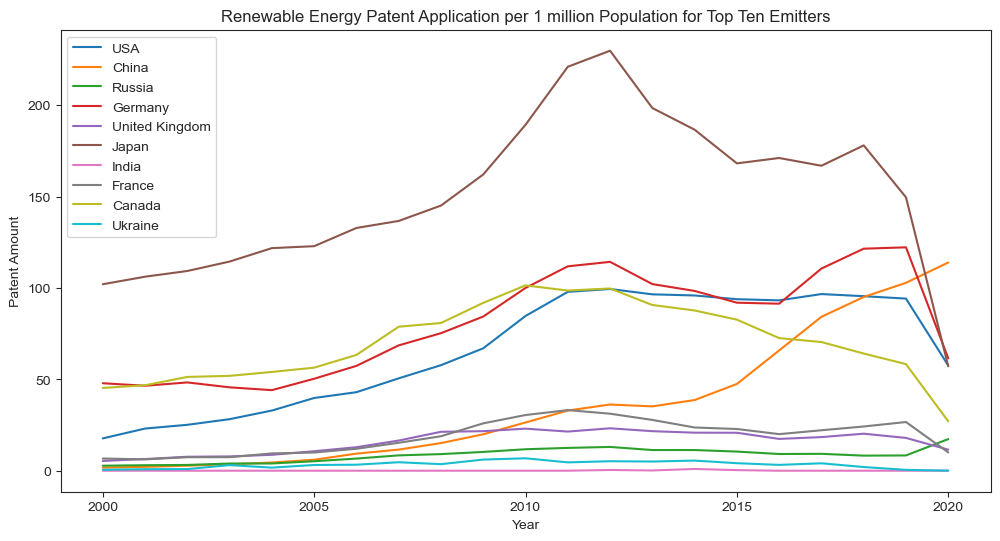

In [69]:
# plot the trend for top ten
columns = list(emission_country_total["Country"])[:10]

fig, ax = plt.subplots(figsize=(12, 6))

sns.set_style("white")
plt.tick_params(left=True, bottom=True)
#sns.despine(top=True, right=True)

for country in columns:
    ax.plot(patent_country["Year"][:], patent_country[country][:], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Patent Amount')
ax.set_title('Renewable Energy Patent Application per 1 million Population for Top Ten Emitters')
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
ax.legend()

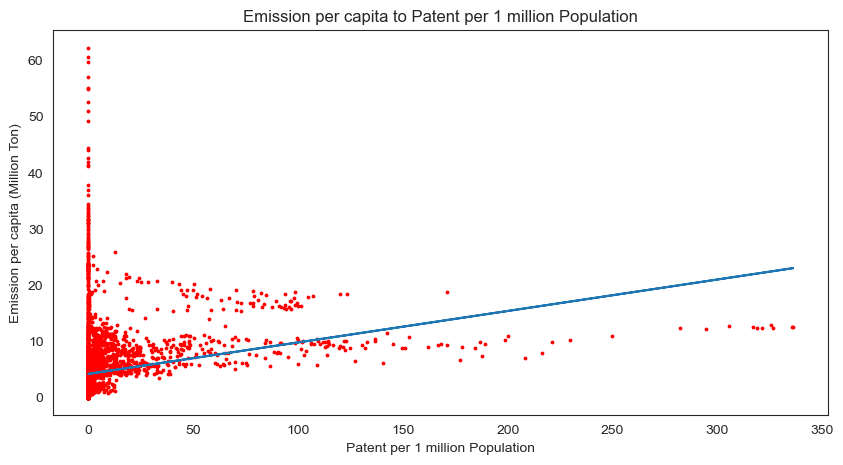

In [70]:
fig, ax = plt.subplots(figsize = (10, 5))

patent_manufacture_population_gdp_emission.plot(kind = "scatter", x = "Patent per 1 million Population", y = "Emission per capita", ax = ax, s = 3, color = "red")

ax.set_title("Emission per capita to Patent per 1 million Population")
ax.set_xlabel("Patent per 1 million Population")
ax.set_ylabel("Emission per capita (Million Ton)")

x = patent_manufacture_population_gdp_emission["Patent per 1 million Population"]
y = patent_manufacture_population_gdp_emission["Emission per capita"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x))

The dot plot illustrating each country's emission per capita and patent per 1 million level fails to reveal any discernible pattern and instead demonstrates an upward-sloping best-fit line. This phenomenon likely stems from the correlation between patent number, GDP per capita, and the positive relationship between GDP per capita and emission level. Countries boasting advanced technology and a high yield of patents typically exhibit elevated GDP levels and energy consumption, thereby resulting in higher emission amounts. The theory positing that higher numbers of renewable energy-related patents indicate greater investment in developing sustainable energy solutions, consequently leading to reduced reliance on fossil fuels and lower emission levels, may only hold true for countries with comparable GDP levels.

Moreover, it is noteworthy that countries with emission per capita surpassing 30 million tonnes uniformly yield zero patents, while those with a substantial number of patents exhibit emission per capita values hovering around 10 million tonnes, a considerably lower figure.


### Policy Strictness: Existance of Carbon Tax or Emission Trading System (ETS)

The inclusion of data on the existence of carbon tax and carbon trading systems is crucial for assessing the impact of policy measures on emission levels. Carbon taxes and trading systems are market-based mechanisms aimed at internalizing the external costs of carbon emissions and incentivizing emission reductions. 

By incorporating information on the existence of these policy instruments, the research can evaluate the effectiveness of regulatory approaches in reducing emissions. Countries that have implemented carbon taxes or trading systems may experience changes in emission levels as industries adjust their behavior in response to the associated costs or incentives.

Additionally, the presence or absence of carbon pricing mechanisms can provide insights into the political and economic landscape of countries. Governments that have enacted carbon pricing policies demonstrate a commitment to addressing climate change and reducing emissions. Conversely, the absence of such policies may reflect regulatory or political barriers to implementing emission reduction measures.

Analyzing the relationship between the existence of carbon pricing mechanisms and emission levels allows for a comprehensive assessment of the role of policy interventions in driving emission reductions. This information is essential for policymakers, stakeholders, and researchers seeking to design and implement effective climate change mitigation strategies.

Import the dataset. For having carbon tax, represent it as `2`, for having a carbon tax only at a sub-national level, represent it by `1`, and for no carbon tax, use `0`:

In [71]:
carbon_tax = pd.read_csv('carbon-tax-instruments.csv')
carbon_tax['Have Carbon Tax'] = [2 if x == 'Has a carbon tax' else 1 if x == 'Has a carbon tax only at a sub-national level' else 0 for x in carbon_tax['Covered by tax instrument in at least one sector']]
carbon_tax = pd.merge(country_code, carbon_tax, on='Code', how='right')
carbon_tax = carbon_tax.drop(columns=['Covered by tax instrument in at least one sector'])

Import the dataset. For having ETS, represent it as `2`, for having a ETS only at a sub-national level, represent it by `1`, and for no ETS, use `0`:

In [72]:
carbon_ets = pd.read_csv('carbon-emissions-trading-system.csv')
carbon_ets['Have ETS'] = [2 if x == 'Has an ETS' else 1 if x == 'Has an ETS only at a sub-national level' else 0 for x in carbon_ets['Covered by emissions trading system in at least one sector']]
carbon_ets = pd.merge(country_code, carbon_ets, on='Code', how='right')
carbon_ets = carbon_ets.drop(columns=['Covered by emissions trading system in at least one sector'])

Merge with the dataset:

In [73]:
tax_patent_manufacture_population_gdp_emission = pd.merge(patent_manufacture_population_gdp_emission, carbon_tax, on=['Country', 'Code', 'Year'], how='left')
ets_tax_patent_manufacture_population_gdp_emission = pd.merge(tax_patent_manufacture_population_gdp_emission, carbon_ets, on=['Country', 'Code', 'Year'], how='left')

To measure the policy strictness, I choose to add the value of `Have Carbon Tax` and `Have ETS`. Thus, the variable `Policy Strictness` can take values from 0 to 4, with higher value representing stricter policies.

In [74]:
ets_tax_patent_manufacture_population_gdp_emission['Policy Strictness'] = ets_tax_patent_manufacture_population_gdp_emission['Have ETS'] + ets_tax_patent_manufacture_population_gdp_emission['Have Carbon Tax']
ets_tax_patent_manufacture_population_gdp_emission.head()

Country Code  Year  Emission per capita  GDP per capita  Population  \
0  Albania  ALB  2000             0.950630     1126.683340   3089027.0   
1  Albania  ALB  2001             1.021259     1281.659826   3060173.0   
2  Albania  ALB  2002             1.200003     1425.124219   3051010.0   
3  Albania  ALB  2003             1.391371     1846.120121   3039616.0   
4  Albania  ALB  2004             1.363761     2373.581292   3026939.0   

   Manufacture Percentage  Patent per 1 million Population  Have Carbon Tax  \
0                4.317846                              0.0              0.0   
1                4.099040                              0.0              0.0   
2                4.066543                              0.0              0.0   
3                4.124160                              0.0              0.0   
4                4.177557                              0.0              0.0   

   Have ETS  Policy Strictness  
0       0.0                0.0  
1       0.0                0.0  
2       0.0                0.0  
3       0.0                0.0  
4       0.0                0.0

Restructure the data and visualize it:

In [75]:
policy_strictness = pd.DataFrame()
policy_strictness['Country'] = ets_tax_patent_manufacture_population_gdp_emission['Country']
policy_strictness['Code'] = ets_tax_patent_manufacture_population_gdp_emission['Code']
policy_strictness['Year'] = ets_tax_patent_manufacture_population_gdp_emission['Year']
policy_strictness['Policy Strictness'] = ets_tax_patent_manufacture_population_gdp_emission['Policy Strictness']

In [76]:
def carbontax (df, year):
    temp = df.get_group(year)
    temp = temp.reset_index()
    temp = temp.drop(columns={"Year", "Country", "index"})
    temp = temp.rename(columns={"Policy Strictness": year})
    return temp

In [77]:
policy_strictness_gb = policy_strictness.groupby('Year')
policy_strictness_year = carbontax(policy_strictness_gb, 2000)
for years in range(2001, 2021):
    policy_strictness_year = pd.merge(policy_strictness_year, carbontax(policy_strictness_gb, years), on='Code')
policy_strictness_year = pd.merge(country_code, policy_strictness_year, on='Code', how='right')

In [78]:
policy_strictness_map = pd.DataFrame()
policy_strictness_map['Country'] = policy_strictness_year['Country']
policy_strictness_map['Code'] = policy_strictness_year['Code']
policy_strictness_map[2005] = policy_strictness_year[2005]
policy_strictness_map[2010] = policy_strictness_year[2010]
policy_strictness_map[2015] = policy_strictness_year[2015]
policy_strictness_map[2020] = policy_strictness_year[2020]
policy_strictness_map = pd.merge(policy_strictness_map, world_geometry, on="Code")
policy_strictness_map = gpd.GeoDataFrame(policy_strictness_map, geometry="geometry")

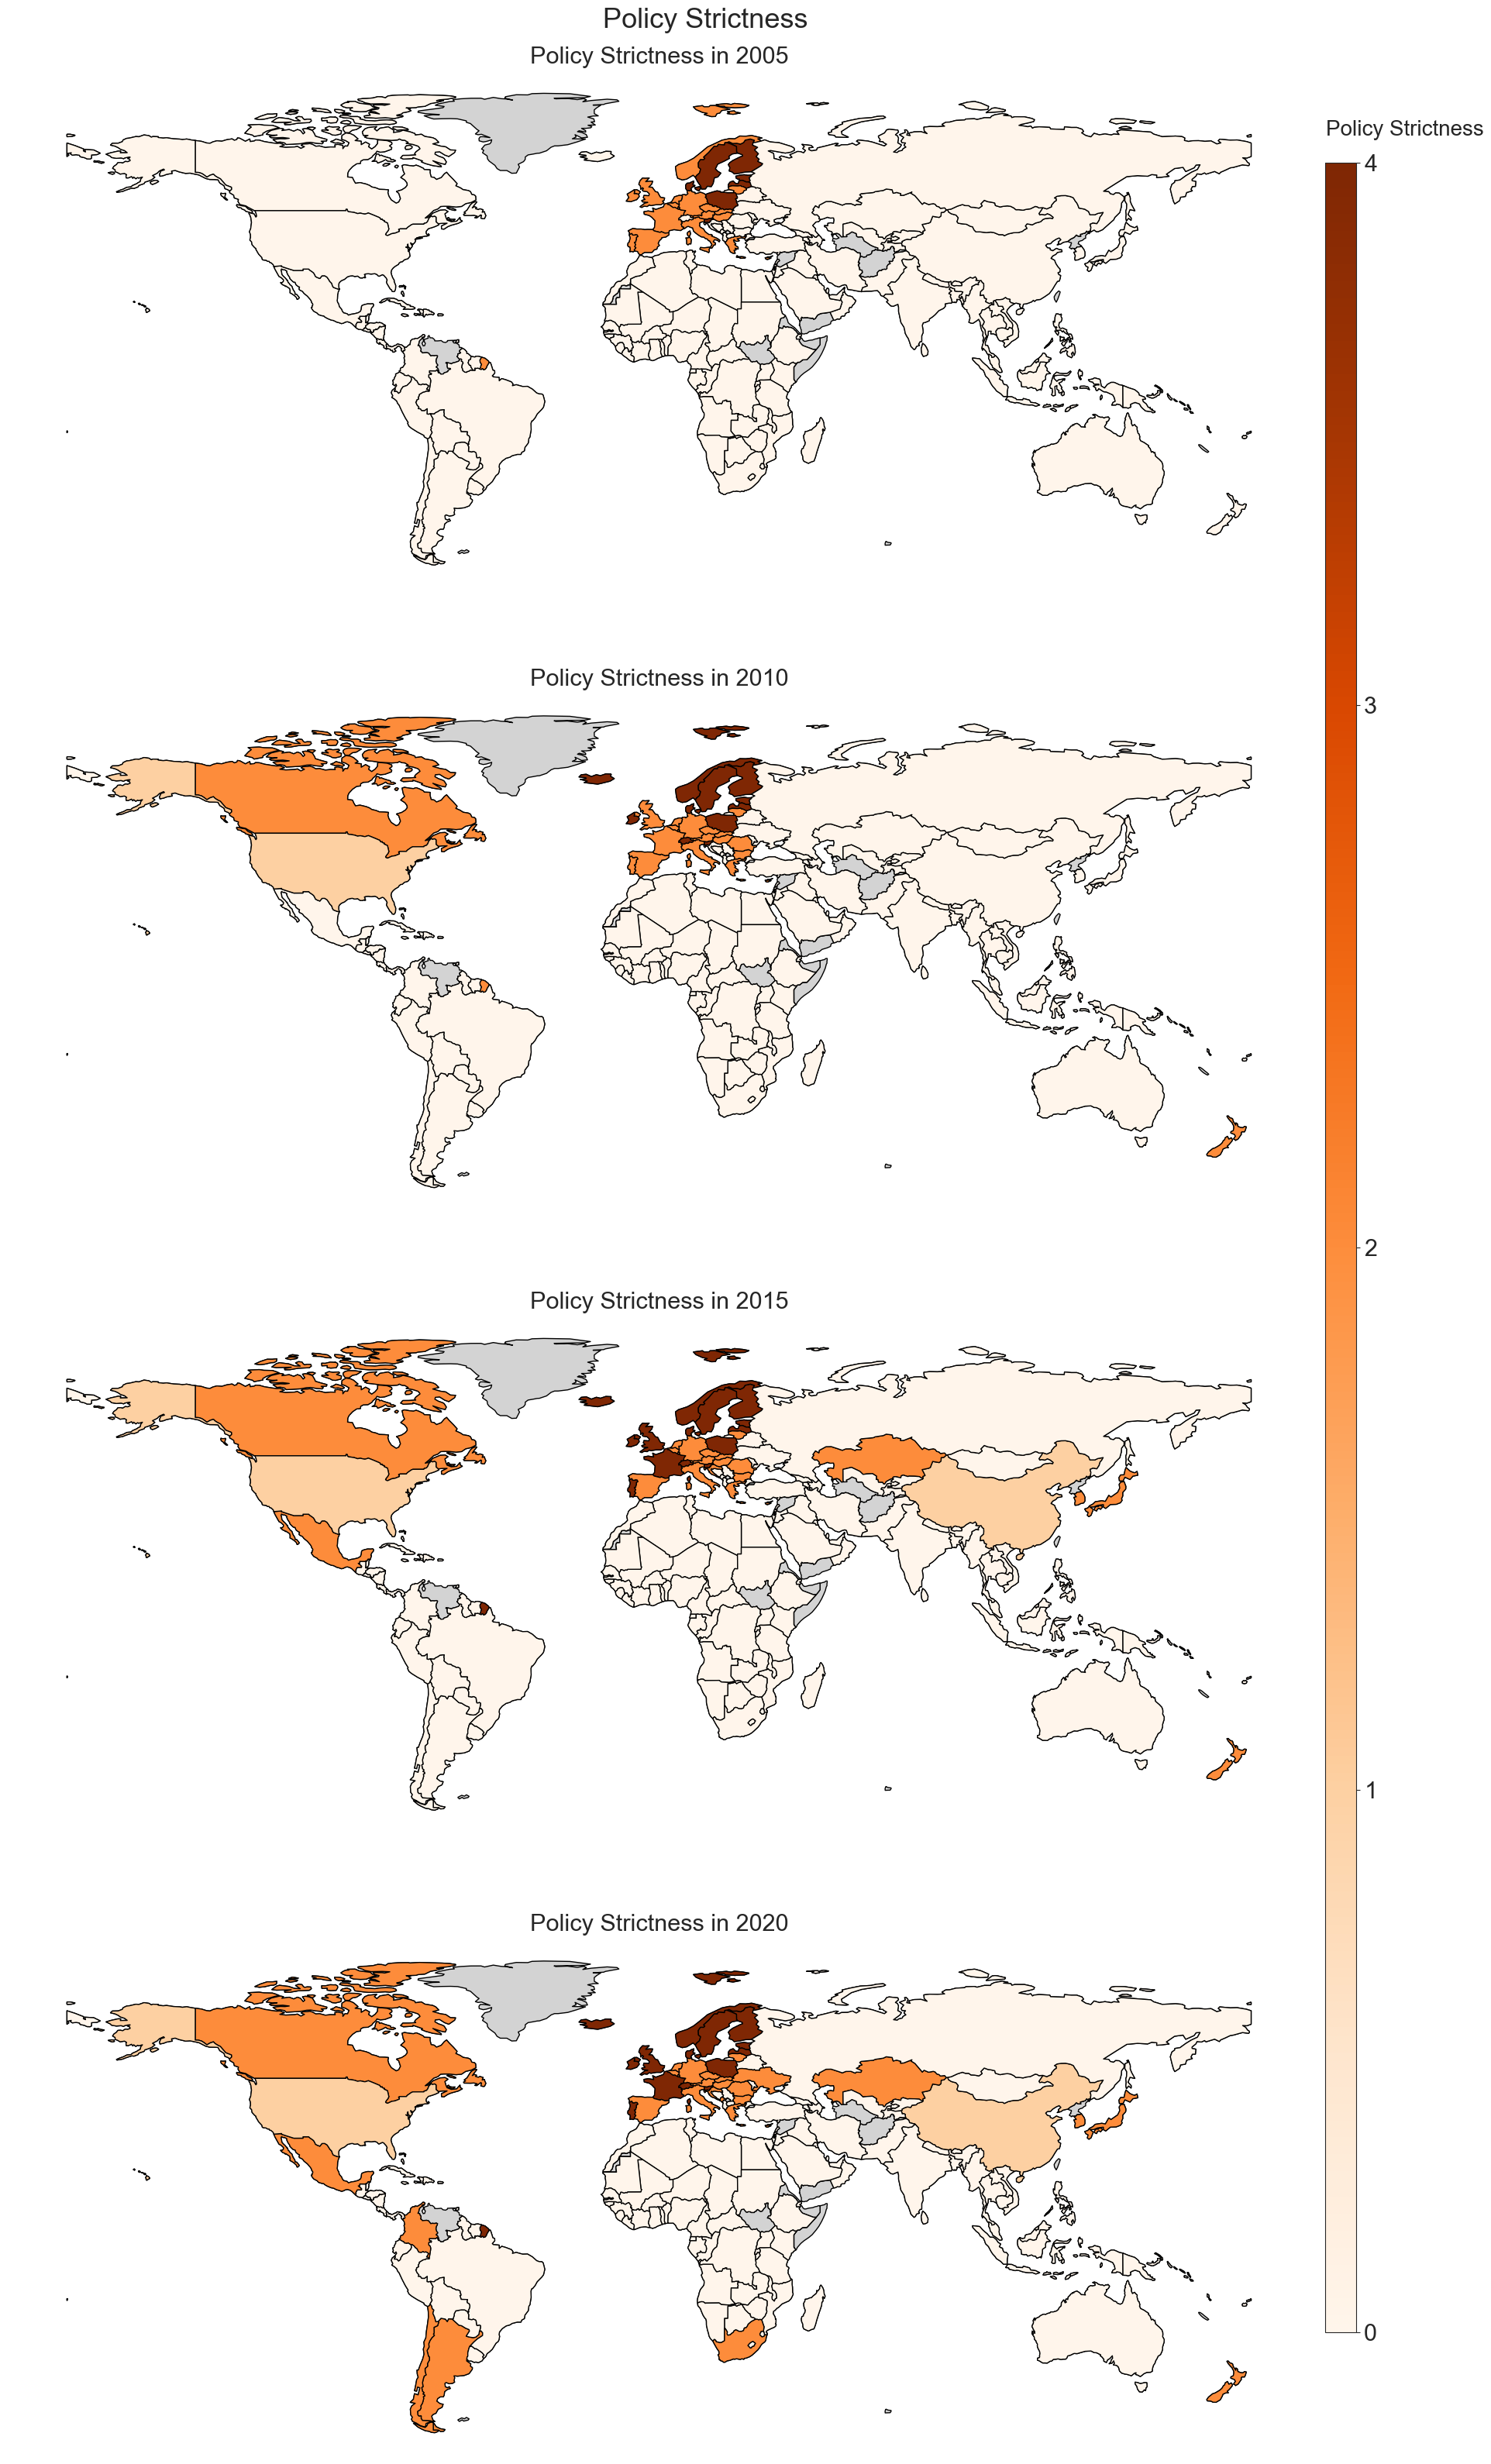

In [79]:
fig, axes = plt.subplots(nrows=4, figsize=(80, 40))
list_gdp_0120 = [2005, 2010, 2015, 2020]
list_title_0120 = ['Policy Strictness in 2005', 'Policy Strictness in 2010', 'Policy Strictness in 2015', 'Policy Strictness in 2020']

plt.suptitle('Policy Strictness', fontsize=26, x=0.52, y=0.9)

# Plot your data on each axis
for i, ax in enumerate(axes.flat):
    world.plot(ax=ax, color='lightgrey', edgecolor='black')
    # Plot each map on a separate axis (you need to replace this with your actual plotting code)
    policy_strictness_map.plot(ax=ax, edgecolor='black', column=list_gdp_0120[i], cmap='Oranges',
                                      vmin=0, vmax=4)
    ax.set_axis_off()
    ax.set_title(list_title_0120[i], fontsize=22)  # Set title for each subplot

cax = fig.add_axes([0.62, 0.15, 0.005, 0.7])  # [left, bottom, width, height]
#two maps: [0.72, 0.15, 0.01, 0.7]

# Add the color bar to the color bar axis
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=4))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=22)
cbar.set_ticks([0, 1, 2, 3, 4], )

plt.text(0.01, 4.05, 'Policy Strictness', fontsize=20)

# Show the plot
plt.show()

Observing the map reveals distinct patterns in emission levels and the implementation of carbon pricing mechanisms across different regions. Countries in Europe stand out for their adoption of both carbon taxes and emissions trading systems (ETS), alongside relatively low emission per capita levels compared to the United States. Moreover, emissions in European countries have exhibited a decreasing trend over the past two decades.

In contrast, the United States initiated the implementation of ETS at the sub-national level in 2010, subsequently experiencing a reduction in emissions. However, emission levels remain comparatively higher than those observed in Europe.

Notably, developing countries such as China, despite the introduction of ETS in 2015, continue to experience a surge in emissions. These findings suggest that the efficacy of carbon pricing policies may be lower in developing countries compared to their developed counterparts.

The disparities observed in emission trends and policy effectiveness underscore the need for further research and tailored interventions to address the unique challenges faced by developing countries in curbing emissions and transitioning to more sustainable energy systems.

### Developing Stage

The objective of the project is to examine the variance in the efficacy of global environmental agreements across different nations, and it is hypothesized that these agreements may exhibit diminished effectiveness in less developed countries. Hence, it becomes imperative to ascertain the developmental stage of each individual country involved in the study.

Nations across the globe are typically categorized into three distinct groups: developed, developing, and least developed countries, based on criteria such as gross national income (GNI) per capita, level of industrialization, overall standard of living, and technological infrastructure, among other pertinent factors. Consequently, the variable denoting the `Development Stage` will assign a value of 2 to signify developed nations, 1 to denote developing nations, and 0 to represent the least developed countries.

Get the developed country list:

In [80]:
web_url = 'https://en.wikipedia.org/wiki/Developed_country#Human_Development_Index_(HDI)'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)

In [81]:
all_list = list(soup_object.find_all('li'))
li_with_austria = []
index = 0
for i in all_list:
    if 'Austria' in i.text:
        index = all_list.index(i, index+1)
        li_with_austria.append(index)
li_with_austria

[150, 184, 214, 261, 396]

In [82]:
list_developed = []
for i in all_list[150: 184]:
    list_developed.append(i.text.strip())
country_developed = pd.DataFrame()
country_developed['Country'] = list_developed
country_developed.at[28, 'Country'] =  'USA'
country_developed = pd.merge(country_developed, country_code, on='Country')

Get the developing coutnry list:

In [83]:
web_url = 'https://en.wikipedia.org/wiki/Developing_country#Country_lists'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)

In [84]:
all_list = list(soup_object.find_all('li'))
li_with_Afghanistan = []
index = 0
for i in all_list:
    if 'Afghanistan' in i.text:
        index = all_list.index(i, index+1)
        li_with_Afghanistan.append(index)
li_with_Afghanistan

[234, 301]

In [85]:
from unidecode import unidecode
list_developing = []
for i in all_list[301: 452]:
    cname = i.text.strip()
    cname = unidecode(cname)
    list_developing.append(cname)
country_developing = pd.DataFrame()
country_developing['Country'] = list_developing
country_developing = pd.merge(country_developing, country_code, on='Country')

Assign values to `Developing Stage` according to the lists, and add it to the merged table:

In [86]:
merged = ets_tax_patent_manufacture_population_gdp_emission.copy()
merged['Developing Stage'] = [2 if x in list(country_developed['Code']) else 1 if x in list(country_developing['Code']) else 0 for x in merged['Code']]
merged.head()

Country Code  Year  Emission per capita  GDP per capita  Population  \
0  Albania  ALB  2000             0.950630     1126.683340   3089027.0   
1  Albania  ALB  2001             1.021259     1281.659826   3060173.0   
2  Albania  ALB  2002             1.200003     1425.124219   3051010.0   
3  Albania  ALB  2003             1.391371     1846.120121   3039616.0   
4  Albania  ALB  2004             1.363761     2373.581292   3026939.0   

   Manufacture Percentage  Patent per 1 million Population  Have Carbon Tax  \
0                4.317846                              0.0              0.0   
1                4.099040                              0.0              0.0   
2                4.066543                              0.0              0.0   
3                4.124160                              0.0              0.0   
4                4.177557                              0.0              0.0   

   Have ETS  Policy Strictness  Developing Stage  
0       0.0                0.0                 1  
1       0.0                0.0                 1  
2       0.0                0.0                 1  
3       0.0                0.0                 1  
4       0.0                0.0                 1

# Final Project

## 4.1 OLS regression

In this section, regression models will be developed for further investigation. With the incorporation of additional datasets outlined in the preceding section, there are now five independent variables: GDP per capita, percentage of manufacturing, patents per 1 million population, policy strictness, and development stage.

To begin, an elucidation will be provided on how these variables, along with newly introduced ones, are economically linked to the dependent variable, emissions per capita, and why they are chosen as Xs.

**1. Agreement Stage, Developing Stage, and AgrDev**

   Considering the primary objective of this project, which is to examine the disparity in the effectiveness of global environmental agreements across different countries, the utilization of the difference-in-differences model for constructing regressions has been decided. The initial step involves the creation of two dummy variables: one representing the treatment stage and the other indicating the difference among groups.

   Specifically, in this project, the variable `Agreement Stage` is employed to denote time. It assumes a value of 0 for periods prior to 2005, marking the inception of the Kyoto Protocol; a value of 1 for the timeframe between 2005 and 2015; and a value of 2 for periods after 2016, coinciding with the implementation of the Paris Agreement.

   The variable `Developing Stage`, introduced in the preceding section, categorizes nations into three groups: developed (assigned a value of 2), developing (assigned a value of 1), and least developed (assigned a value of 0) countries.

   The subsequent step in constructing a difference-in-differences model involves the creation of an interactive variable, denoted as `AgrDev`, which represents the product of `Agreement Stage` and `Developing Stage`, and thus could take value of 0, 1, 2, or 4.

   Then we can have regression model:
    
   $$
    \text{emission per capita} = \beta_0 + \beta_1 \text{Agreement Stage} + \beta_2 \text{Developing Stage} + \beta_3 \text{AgrDev} + u
    $$
    
   - In stage 0, before 2005:
    
        type 0 country (least developed country): 
        
        $$
        \text{emission per capita} = \beta_0 + u
        $$
        
        type 1 country (developing country):
        
        $$
        \text{emission per capita} = \beta_0 + \beta_2 + u
        $$
        
        type 2 country (developed country):
        
        $$
        \text{emission per capita} = \beta_0 + 2\beta_2 + u
        $$
        
   - In stage 1, between 2005 and 2016:
    
        type 0 country (least developed country): 
        
        $$
        \text{emission per capita} = \beta_0 + \beta_1 + u
        $$
        
        type 1 country (developing country):
        
        $$
        \text{emission per capita} = \beta_0 + \beta_1 + \beta_2 + \beta_3 + u
        $$
        
        type 2 country (developed country):
        
        $$
        \text{emission per capita} = \beta_0 + \beta_1 + 2\beta_2 + 2\beta_3 + u
        $$
        
   - In stage 2, after 2016:
    
        type 0 country (least developed country): 
        
        $$
        \text{emission per capita} = \beta_0 + 2\beta_1 + u
        $$
        
        type 1 country (developing country):
        
        $$
        \text{emission per capita} = \beta_0 + 2\beta_1 + \beta_2 + 2\beta_3 + u
        $$
        
        type 2 country (developed country):
        
        $$
        \text{emission per capita} = \beta_0 + 2\beta_1 + 2\beta_2 + 4\beta_3 + u
        $$
        
  Thus, I can assign meanings to $ \beta_0 $, $ \beta_1 $, $ \beta_2 $ and $ \beta_3 $:
    - $ \beta_1 $: the change in emission for least developed countries in each stage
    - $ \beta_1 + \beta_3 $: the change in emission for developing countries in each stage
    - $ \beta_1 + 2\beta_3 $: the change in emission for developed countries in each stage
    
  So $ \beta_3 $ measures the difference in difference. 
  
  In my hypothesis, I expect $ \beta_1 + 2\beta_3 < \beta_1 + \beta_3 < \beta_1 $, thus $\beta_3 < 0$.
  
  
**2. GDP per capita**

Higher GDP per capita usually implies higher levels of economic activity and industrialization level. Industrial processes, transportation, and energy consumption are major contributors to greenhouse gas emissions. As economies grow, they tend to consume more energy, leading to higher emissions.
    
While GDP is a crucial determinant in categorizing a country as developed, developing, or least developed, and is consequently associated with the variable `Developing Stage`, it's worth noting that countries within the same stage can exhibit considerable variance in GDP per capita. Therefore, it remains imperative to include GDP as a control variable in the difference-in-difference model.
   
The relationship between GDP and emissions is likely to be **non-linear** due to the influence of various other factors. In instances where both emissions and GDP are relatively low, GDP growth may heavily depend on industries like manufacturing, which typically generate significant emissions. Consequently, emissions might increase at a faster rate than GDP. Conversely, when GDP is relatively high, the rate of emission growth may decelerate due to advancements in recycling technology, reductions in manufacturing activities, or the implementation of stricter environmental policies driven by growing public awareness of environmental conservation.

To account for these complexities, incorporating the power of GDP per capita and interacting it with other variables in regression analysis can better control the variance.

**3. Manufacture Percentage**

This variable represents the proportion of the manufacturing sector within the total GDP of a country. Countries with a higher manufacturing percentage of GDP often have more industrial activity, including manufacturing processes that can be energy-intensive and produce emissions. Therefore, a higher manufacturing percentage of GDP may lead to higher emissions per capita due to the direct emissions associated with industrial processes.

The relationship in question is also prone to **non-linearity**. As the manufacturing industry expands, comprising a larger share of the total GDP, pollution concerns escalate, prompting governments to enact stricter policies aimed at reducing CO2 emissions. Furthermore, firms are consistently incentivized to minimize costs, including those associated with pollution. As the manufacturing sector's growth affords more resources for research and development, an increase in patent yields is likely. Consequently, emission levels may decrease due to technological advancements.

To account for these complexities, incorporating the power of GDP per capita and interacting it with other variables in regression analysis can better control the variance. As mentioned in the GDP part, for same GDP level, higher manufacture percentage many imply higher emission, so create an interaction term `Manufacture Part GDP per capita(thousand USD)`, which is the product of GDP per capita and manufacture percentage.

**4. Patent**

My patent data records the number of renewable energy related patent for each country. Intuitively, with more patents in renewable energy field, quicker and easier it will be for the country to transform the traditional electric plants to renewable ones, thus reduce the emissions.

The relationship in question likely exhibits **non-linearity**. Not all inventions within patents may prove impactful enough to significantly enhance the efficiency of renewable energy production. Prior to any groundbreaking inventions, as technology advances, the incremental impact of additional patents may diminish, resulting in diminishing returns regarding emission reductions.

In my regression analysis, I incorporate the number of patents per 1 million population, aligning it with variables such as emission per capita and GDP per capita to maintain consistency in scale. This inclusion allows for the creation of the interaction term `GDPPatent` and `ManuPatent`, which represents the product of GDP per capita and patents per 1 million population and the product of manufacture percentage and patent per 1 million population correspondingly.

**5. Policy Strictness**

The policy strictness term is the product of `Have Carbon Tax` and `Have ETS`, which both have 0 representing no such policy, 1 representing implemented in sub-national regions, and 2 representing implemented in the entire country. Strict environmental policies can directly influence emission levels by requiring industries to reduce their emissions to comply with legal requirements. Noncompliance may result in penalties or fines, incentivizing companies to invest in cleaner technologies and practices to meet regulatory standards.

The relation between this and emission per capita is likely to be **non-linear**. Intuitively, as policies become stricter, there may be significant reductions in emissions as industries invest in cleaner technologies and practices to comply with regulations. However, beyond a certain threshold, the marginal benefits of additional policy strictness may diminish, leading to diminishing returns in terms of emission reductions. In addition, the relationship between policy strictness and emissions is influenced by a multitude of factors, including technological feasibility, regulatory enforcement, public acceptance, and economic incentives. The interactions between these factors are complex and may lead to nonlinear outcomes.

To incorporate it into the regression model, I can create interactions terms.
- `GDPPolicy`: product of GDP per caipta and policy strictness
- `ManuPolicy`: product of manufacture percentage and policy strictness
- `PoliPatent`: product of polict strictness and patent per 1 million population

In [87]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

Create interaction terms:

In [88]:
regression_table = merged.copy()

regression_table['Agreement Stage'] = [0 if x <= 2005 else 1 if x <= 2015 else 2 for x in regression_table['Year']]
regression_table['AgrDev'] = regression_table['Agreement Stage'] * regression_table['Developing Stage']

regression_table['GDP per capita(thousand $)'] = regression_table['GDP per capita']/1000
regression_table['GDP per capita square(million $)'] = regression_table['GDP per capita(thousand $)']*regression_table['GDP per capita(thousand $)']
regression_table['Manufacture Part GDP per capita(thousand $)'] = regression_table['GDP per capita(thousand $)'] * regression_table['Manufacture Percentage']
regression_table['GDPPatent'] = regression_table['GDP per capita(thousand $)'] * regression_table['Patent per 1 million Population']/100
regression_table['GDPPolicy'] = regression_table['GDP per capita(thousand $)'] * regression_table['Policy Strictness']

regression_table['ManuPolicy'] = regression_table['Manufacture Percentage'] * regression_table['Policy Strictness']
regression_table['ManuPatent'] = regression_table['Manufacture Percentage'] * regression_table['Patent per 1 million Population']

regression_table['PoliPatent'] = regression_table['Policy Strictness'] * regression_table['Patent per 1 million Population']

regression_table.head()

Country Code  Year  Emission per capita  GDP per capita  Population  \
0  Albania  ALB  2000             0.950630     1126.683340   3089027.0   
1  Albania  ALB  2001             1.021259     1281.659826   3060173.0   
2  Albania  ALB  2002             1.200003     1425.124219   3051010.0   
3  Albania  ALB  2003             1.391371     1846.120121   3039616.0   
4  Albania  ALB  2004             1.363761     2373.581292   3026939.0   

   Manufacture Percentage  Patent per 1 million Population  Have Carbon Tax  \
0                4.317846                              0.0              0.0   
1                4.099040                              0.0              0.0   
2                4.066543                              0.0              0.0   
3                4.124160                              0.0              0.0   
4                4.177557                              0.0              0.0   

   Have ETS  ...  Agreement Stage  AgrDev  GDP per capita(thousand $)  \
0       0.0  ...                0       0                    1.126683   
1       0.0  ...                0       0                    1.281660   
2       0.0  ...                0       0                    1.425124   
3       0.0  ...                0       0                    1.846120   
4       0.0  ...                0       0                    2.373581   

   GDP per capita square(million $)  \
0                          1.269415   
1                          1.642652   
2                          2.030979   
3                          3.408160   
4                          5.633888   

   Manufacture Part GDP per capita(thousand $)  GDPPatent  GDPPolicy  \
0                                     4.864845        0.0        0.0   
1                                     5.253575        0.0        0.0   
2                                     5.795329        0.0        0.0   
3                                     7.613695        0.0        0.0   
4                                     9.915771        0.0        0.0   

   ManuPolicy  ManuPatent  PoliPatent  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2         0.0         0.0         0.0  
3         0.0         0.0         0.0  
4         0.0         0.0         0.0  

[5 rows x 22 columns]

In [89]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [90]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

Create regression models:

In [91]:
regression_table['const'] = 1
X1 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev'] #Basic regression for difference in difference

X2 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'GDP per capita(thousand $)', 'GDP per capita square(million $)']
X3 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'GDP per capita(thousand $)', 'Manufacture Percentage', 'Manufacture Part GDP per capita(thousand $)']
X4 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'GDP per capita(thousand $)', 'Patent per 1 million Population', 'GDPPatent']
X5 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'GDP per capita(thousand $)', 'Policy Strictness', 'GDPPolicy']


X6 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'Manufacture Percentage', 'Policy Strictness', 'ManuPolicy']
X7 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'Manufacture Percentage', 'Patent per 1 million Population', 'ManuPatent']
X8 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'Policy Strictness', 'Patent per 1 million Population', 'PoliPatent']


reg1 = sm.OLS(regression_table['Emission per capita'], regression_table[X1], missing='drop').fit()
reg2 = sm.OLS(regression_table['Emission per capita'], regression_table[X2], missing='drop').fit()
reg3 = sm.OLS(regression_table['Emission per capita'], regression_table[X3], missing='drop').fit()
reg4 = sm.OLS(regression_table['Emission per capita'], regression_table[X4], missing='drop').fit()
reg5 = sm.OLS(regression_table['Emission per capita'], regression_table[X5], missing='drop').fit()
reg6 = sm.OLS(regression_table['Emission per capita'], regression_table[X6], missing='drop').fit()
reg7 = sm.OLS(regression_table['Emission per capita'], regression_table[X7], missing='drop').fit()
reg8 = sm.OLS(regression_table['Emission per capita'], regression_table[X8], missing='drop').fit()

In [92]:
stargazer = Stargazer([reg1])
HTML(stargazer.render_html())

**Model 1: Basic Difference-in-Difference**

This is the basic difference in difference model that has no controlling variables. 

The coefficient for `AgrDev` is -0.485, which is the $\beta_3$ that measures the difference in difference value mentioned previously. This value is negative and can support my hypothesis that the effectiveness of agreements is lower in less developed countries. Also, we can calculate the followings:

- $ \beta_1 $ (the change in emission for least developed countries in each stage): 0.450
- $ \beta_1 + \beta_3 $ (the change in emission for developing countries in each stage): -0.035
- $ \beta_1 + 2\beta_3 $ (the change in emission for developed countries in each stage): -0.520

The regression table shows that the $R^2$ value is 0.033, which is a very low value, indicating that there are many other influential factors not incorporated. This is ture as there are multiple variables that could add complexity to the estimation of emission level, and we need to control them by adding them to the model.

In [93]:
stargazer = Stargazer([reg2, reg3, reg4, reg5])
HTML(stargazer.render_html())

These three models aim to account for the influence of GDP per capita.

**Model 2: GDP and GDP square**

Recognizing the potential for a significant increase in emissions with a rise in GDP, particularly when GDP is relatively low, I employ the square of GDP per capita in regression analysis. This model incorporates two more variables: GDP per capita and its square. 

However, though the R2 increased, suggesting that GDP per capita is indeed related to emission level, the unexpected negative coefficient of GDP per capita square challenges the reliability of the hypothesis.

**Model 3: GDP and Manufacture percentage**

Considering that countries with similar GDP per capita may vary in their reliance on the manufacturing industry, and countries with higher manufacturing industry generally can produce more pollutions, I introduce three variables into regression analysis: GDP per capita, the manufacturing percentage of GDP, and the interaction term between manufacturing sector contribution and GDP per capita. 

The results, depicted in the table, confirm the alignment of coefficients with the hypothesis: 

- $\beta_\text{Manufacture Part GDP} = 0.003$, 1% increase in manufacture percentage can increase the coefficient of GDP per capita by 0.003, thus the same increase in GDP per capita can cause more increase in emission per capita.

Furthermore, the substantially higher $R^2 = 0.346$ compared to 0.033 in Model 1 suggests that these variables collectively explain more variance in emissions. Additionally, p-values for all these variables are below 0.01, indicating their significance in the model.

The new $\beta_3 = -0.988$, smaller than that in model 1, suggesting that after incorporating these variables, the difference in the effectiveness is greater than we estimated before.

**Model 4: GDP and Patent number**

In instances of high GDP per capita, economic development often coincides with technological advancements that have the potential to mitigate the CO2 emission increments caused by GDP increase. To gauge this effect, I include GDP per capita, patents per 1 million population, and the interaction term GDPPatent in the regression model.

The results, depicted in the table, confirm the alignment of coefficients with the hypothesis: 

- $\beta_\text{GDPPatent} = -0.220$, 1 unit increase in patent per 1 million population can decrease the coefficient of GDP per capita by 0.220, thus the same increase in GDP per capita can cause less increase in emission per capita.

The positive $\beta_\text{Patent per 1 million Population} = 0.088$ is probably due to the fact that countries with more emissions generally are more developed and have higher patent number, so that the true relation is only revealed in the interaction term.

Furthermore, the substantially higher $R^2 = 0.359$ compared to 0.033 in Model 1 suggests that these variables collectively explain more variance in emissions. Additionally, p-values for all these variables are below 0.01, indicating their significance in the model.

The new $\beta_3 = -0.695$, smaller than that in model 1, suggesting that after incorporating these variables, the difference in the effectiveness is greater than we estimated before.

**Model 5: GDP and Policy strictness**

Policy stringency is a significant determinant in estimating emissions per capita. In cases where countries share similar GDP levels, it's highly likely that stringent policies compel firms to mitigate pollution, resulting in lower emissions. Therefore, I introduced three variables into the model: GDP per capita, policy stringency, and GDPPolicy, representing the interaction between the former two variables.

The results, depicted in the table, confirm the alignment of coefficients with the hypothesis: 

- $\beta_\text{GDPPolicy} = -0.093$, 1 unit increase in policy strictness can decrease the coefficient of GDP per capita by 0.093, thus the same increase in GDP per capita can cause less increase in emission per capita.

The positive $\beta_\text{Policy Strictness} = 1.633$ is probably due to the fact that countries with more emissions generally are more developed, care more about sustainable growth and have stricter policies, so that the true relation is only revealed in the interaction term.

Furthermore, the substantially higher $R^2 = 0.481$ compared to 0.033 in Model 1 suggests that these variables collectively explain more variance in emissions. Additionally, p-values for all these variables are below 0.01, indicating their significance in the model.

The new $\beta_3 = 0.358$, somehow contradict my hypothesis.

In [94]:
stargazer = Stargazer([reg6, reg7, reg8])
HTML(stargazer.render_html())

In this group of models, I aim to determine the significance of manufacturing percentage on emission levels and explore its interaction with other variables. 

**Model 6: Manufacture percantage and Policy strictness**

Drawing upon the rationale behind the interaction between GDP per capita and policy strictness, I further hypothesize that countries with a higher proportion of manufacturing activity tend to implement stricter environmental policies to mitigate pollution and foster sustainable growth. To explore this hypothesis, I introduced three additional variables into the model: manufacturing percentage, policy strictness, and their interaction term. This enables a comprehensive examination of how manufacturing activity, policy stringency, and their interaction influence emission levels.

The results, depicted in the table, confirm the alignment of coefficients with the hypothesis: 

- $\beta_\text{ManuPolicy} = -0.043$, 1 unit increase in policy strictness can decrease the coefficient of manufacture percentage by 0.004, thus the same increase in GDP per capita can cause less increase in emission per capita.

Similarly, here the positive $\beta_\text{Policy Strictness} = 1.731$ is also probably due to the fact that countries with more emissions generally are more developed, care more about sustainable growth and have stricter policies, and the true relation is only revealed in the interaction term.

The new $\beta_3 = -1.095$, smaller than that in model 1, suggesting that after incorporating these variables, the difference in the effectiveness is greater than we estimated before.

However, the new $R^2 = 0.064$, not much higher than that in model 1, suggesting that these three variables have not incorporated much vairance into the model

**Model 7: Manufacture percentage and Patent nunber**

Taking into account the potential association between the manufacturing percentage and patents, whereby countries relying more on the manufacturing industry might allocate greater resources to related research and development, I formulated a model that integrates patent number, manufacturing percentage, and their interaction term.

The results, depicted in the table, confirm the alignment of coefficients with the hypothesis: 

- $\beta_\text{ManuPatent} = -0.004$, 1 unit increase in patent per 1 million population can decrease the coefficient of manufacture percentage by 0.004, thus the same increase in GDP per capita can cause less increase in emission per capita.

Similarly, here the positive $\beta_\text{Patent per 1 million Population} = 0.127$ is probably due to the fact that countries with more emissions generally are more developed and have higher patent number, and the true relation is only revealed in the interaction term.

The new $\beta_3 = -0.525$, smaller than that in model 1, suggesting that after incorporating these variables, the difference in the effectiveness is greater than we estimated before.

However, the new $R^2 = 0.089$, not much higher than that in model 1, suggesting that these three variables have not incorporated much vairance into the model.

**Model 8: Patent number and Policy strictness**

There could also be correlations between policy stringency and the number of patents: as policies become more stringent, firms are likely to be incentivized to explore renewable energy solutions, leading to an increase in patent filings. Although these two variables typically have higher values in countries with higher emissions per capita, they intuitively have mitigating effects on emission levels. To explore this relationship, I devised a model that incorporates policy stringency, patent numbers, and their interaction. This approach aims to uncover the impact of controlling these two variables on the difference-in-difference coefficient, providing insights into their combined influence on emissions reduction efforts.

In the results on the regression table, we can see that:

- $\beta_\text{PoliPatent} = -0.018$, the interaction term has negative coefficient, suggesting that the combined effect of these two varaibles is negative, even though $\beta_\text{Policy Strictness} = 1.406$ and $\beta_\text{Patent Number} = 0.065$ are postive.

The new $R^2 = 0.102$, not much higher than that in model 1, also suggesting that these three variables have not incorporated much vairance into the model.


When not including GDP per capita in the regressions, we can observe a significant reduction in $R^2$, indicating the significance of GDP per capita in this model.

In [95]:
X9 = ['const', 'Agreement Stage', 'Developing Stage', 'AgrDev', 'GDP per capita(thousand $)', 'Manufacture Percentage', 'Manufacture Part GDP per capita(thousand $)', 'GDPPatent', 'ManuPolicy']
reg9 = sm.OLS(regression_table['Emission per capita'], regression_table[X9], missing='drop').fit()

stargazer = Stargazer([reg9])
HTML(stargazer.render_html())

**Model 9: Prefered regression**

After conducting the eight regressions as outlined earlier, it has become evident that the primary factors explaining the variance in emission per capita are GDP per capita and the manufacturing percentage. Additionally, both policy stringency and patent numbers show significance, with their true effects being reflected in interaction terms. Given that interactions between GDP and other variables exhibit lower p-values, I have decided to incorporate the following control variables into the final regression model: GDP per capita, manufacturing percentage, manufacture sector GDP per capita, ManuPolicy, and GDPPatent.


- $\beta_\text{AgrDev} = -0.234$: this is the $\beta_3$, or the difference-in-difference value mentioned in the difference-in-difference model. This coefficient is negative, suggesting that in more developed countries, the reduction in emissions is greater when global agreements are introduced compared to less developed countries. This finding strongly supports my hypothesis. After incorporating the controlling variables, the absolute value of the coefficient decreases, indicating that the actual difference is not as significant when other variables are held constant.


- $\beta_\text{Agreement Stage} = -0.397$: this is the $\beta_1$ in the difference-in-difference model. With this value we can calculate:

    - $ \beta_1 $ (the change in emission for least developed countries in each stage): -0.397
    - $ \beta_1 + \beta_3 $ (the change in emission for developing countries in each stage): -0.631
    - $ \beta_1 + 2\beta_3 $ (the change in emission for developed countries in each stage): -0.865
    
    These values indicate that for all kind of countries, if we control the variables to be the same, having Kyoto Protocol and Paris Agreement can reduce the CO2 emission level.
    
    
- $\beta_\text{Developing Stage} = 0.017$: this is the $\beta_2$ in the difference-in-difference model. This positive value reveals that in any stage of agreements, the development will always cause more emissions.


- $\beta_\text{GDP per capita} = 0.246$: this positive value reveals the relationship between GDP per capita and the emission per capita is positive if other variables remains the same.


- $\beta_\text{Manufacture Percentage} = 0.009$: this positive value reveals the relationship between manufacturing portion in GDP and the emission per capita is positive if other variables remains the same.


- $\beta_\text{ManuPolicy} = -0.041$: this negative value reveals that if policy becomes stricter, the same increase in manufacture percentage can cause less increase in emission per capita.


- $\beta_\text{GDPPatent} = -0.049$: this negative value reveals that if there are more patents yielded, the same increase in GDP per capita can cause less increase in emission per capita.


- $\beta_\text{Manufacture Part GDP per capita} = 0.003$: this positive value reveals that if GDP relies more on manufacture, the same increase in GDP per capita can cause more increase in emission per capita.


- $R^2 = 0.418$: considering the complexity of estimating the emission level, the 0.418 $R^2$ value indicates my regression is somehow reliable.


- p-values: the p-value of all my control variables are smaller than 0.01, indicating all these variables are significant.
 

**Regression Conclusion**

Based on the results obtained from this regression analysis, it can be concluded that when controlling for GDP per capita, manufacturing percentage, patent number, and policy strictness, more developed countries experience a greater reduction in emissions following the implementation of global agreements. Additionally, the presence of agreements such as the Kyoto Protocol and Paris Agreement indeed contributed to the decrease in CO2 emission levels, regardless of the development stage. Furthermore, economic development always tends to lead to an increase in emissions no matter whether these agreements are implemented.

## 4.2 Machine Learning

To enhance the estimation of the differential effects of agreements across countries and improve the accuracy of coefficients, I integrated machine learning techniques such as regression trees and random forest models into the analysis. These methods allow for more nuanced understanding by capturing complex interactions and non-linear relationships between variables, ultimately providing more precise estimates of the impacts of global agreements on emissions across diverse contexts.

The regression function I choose can be written as the following equation:

$$
\text{Emission per capia} = \beta_0 + \beta_1 \text{Agreement Stage} + \beta_2 \text{Developing Stage} + \beta_3 \text{AgrDev} + \beta_4 \text{GDP per capita} + \beta_5 \text{Manufacture Percentage} + \beta_6 \text{Manufacture Part GDP per capita} + \beta_7 \text{GDPPatent} + \beta_8 \text{ManuPolicy} + u
$$



### Regression Tree

The objective function of my regression tree is formulated as follows:

$$
\min \sum_{j=1}^J\sum_{R_j \subset R} (\text{Emssion per capita} - \hat {Emission per capita}_{Rj})^2
$$

Where $R$ is the set of all regions, $\text{Emssion per capita}$ is the value of emission per capita in the data set, $\hat {Emission per capita}_{Rj}$ is the estimated emission per capita within the region $R_j$:

$$
\hat{Emission per capia} = \hat\beta_0 + \hat\beta_1 \text{Agreement Stage} + \hat\beta_2 \text{Developing Stage} + \hat\beta_3 \text{AgrDev} + \hat\beta_4 \text{GDP per capita} + \hat\beta_5 \text{Manufacture Percentage} + \hat\beta_6 \text{Manufacture Part GDP per capita} + \hat\beta_7 \text{GDPPatent} + \hat\beta_8 \text{ManuPolicy}
$$

The objective function aims to minimize the sum of squared differences between the actual and predicted values of emission per capita across all observations. This minimization process results in the tree structure that best fits the data and minimizes the mean squared error, making it an effective approach for modeling the complex relationships between the controlling varaibles and the emission per capita, and predicting the value of emission percapita and the coefficient  accurately.

In [96]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import linear_model

In [97]:
X = pd.DataFrame()
X['ArgDev'] = [float(x) for x in regression_table['AgrDev']]
X['Agreement Stage'] = [float(x) for x in regression_table['Agreement Stage']]
X['Developing Stage'] = [float(x) for x in regression_table['Developing Stage']]
X['GDP per capita'] = regression_table['GDP per capita(thousand $)']
X['Manufacture Percentage'] = regression_table['Manufacture Percentage']
X['Manufacture Part GDP per capita(thousand $)'] = regression_table['Manufacture Part GDP per capita(thousand $)']
X['GDPPatent'] = regression_table['GDPPatent']
X['ManuPolicy'] = regression_table['ManuPolicy']
y = regression_table['Emission per capita']
X['ManuPolicy'].fillna(0, inplace=True)

The aim of my regression tree is to minimize the mean squared error of the dependent variable, emission per capita, within my model. Here's how I'll adjust several regularization parameters to tailor the tree to my dataset:

- **Max Depth**: This parameter determines the maximum depth of the tree. A higher value can increase the tree's complexity and depth. To balance complexity with predictive performance, I've set it to 5. This ensures the tree remains sufficiently deep for accurate predictions while avoiding excessive complexity.

- **Minimum Impurity Decrease ($\alpha$)**: This parameter governs the trade-off between model fit and generalization to unseen data. Higher values impose a stronger constraint on the tree, potentially simplifying its structure and reducing overfitting. I've chosen a value of 0.5 to strike a balance between model complexity and predictive accuracy.

- **Minimum Sample Split**: This parameter sets the minimum number of samples required to split an internal node. Setting it to 5 helps prevent overfitting by ensuring that nodes are only split when there is sufficient data.

- **Minimum Sample Node**: Similarly, this parameter establishes the minimum number of samples required at a leaf node. By setting it to 5, I aim to prevent overfitting and ensure that leaf nodes contain enough data for reliable predictions.

- **Max Leaf Nodes**: Finally, this parameter limits the maximum number of leaf nodes in the tree. I've chosen a value of 8 to prevent the model from becoming overly complex while still allowing for sufficient granularity in predictions.

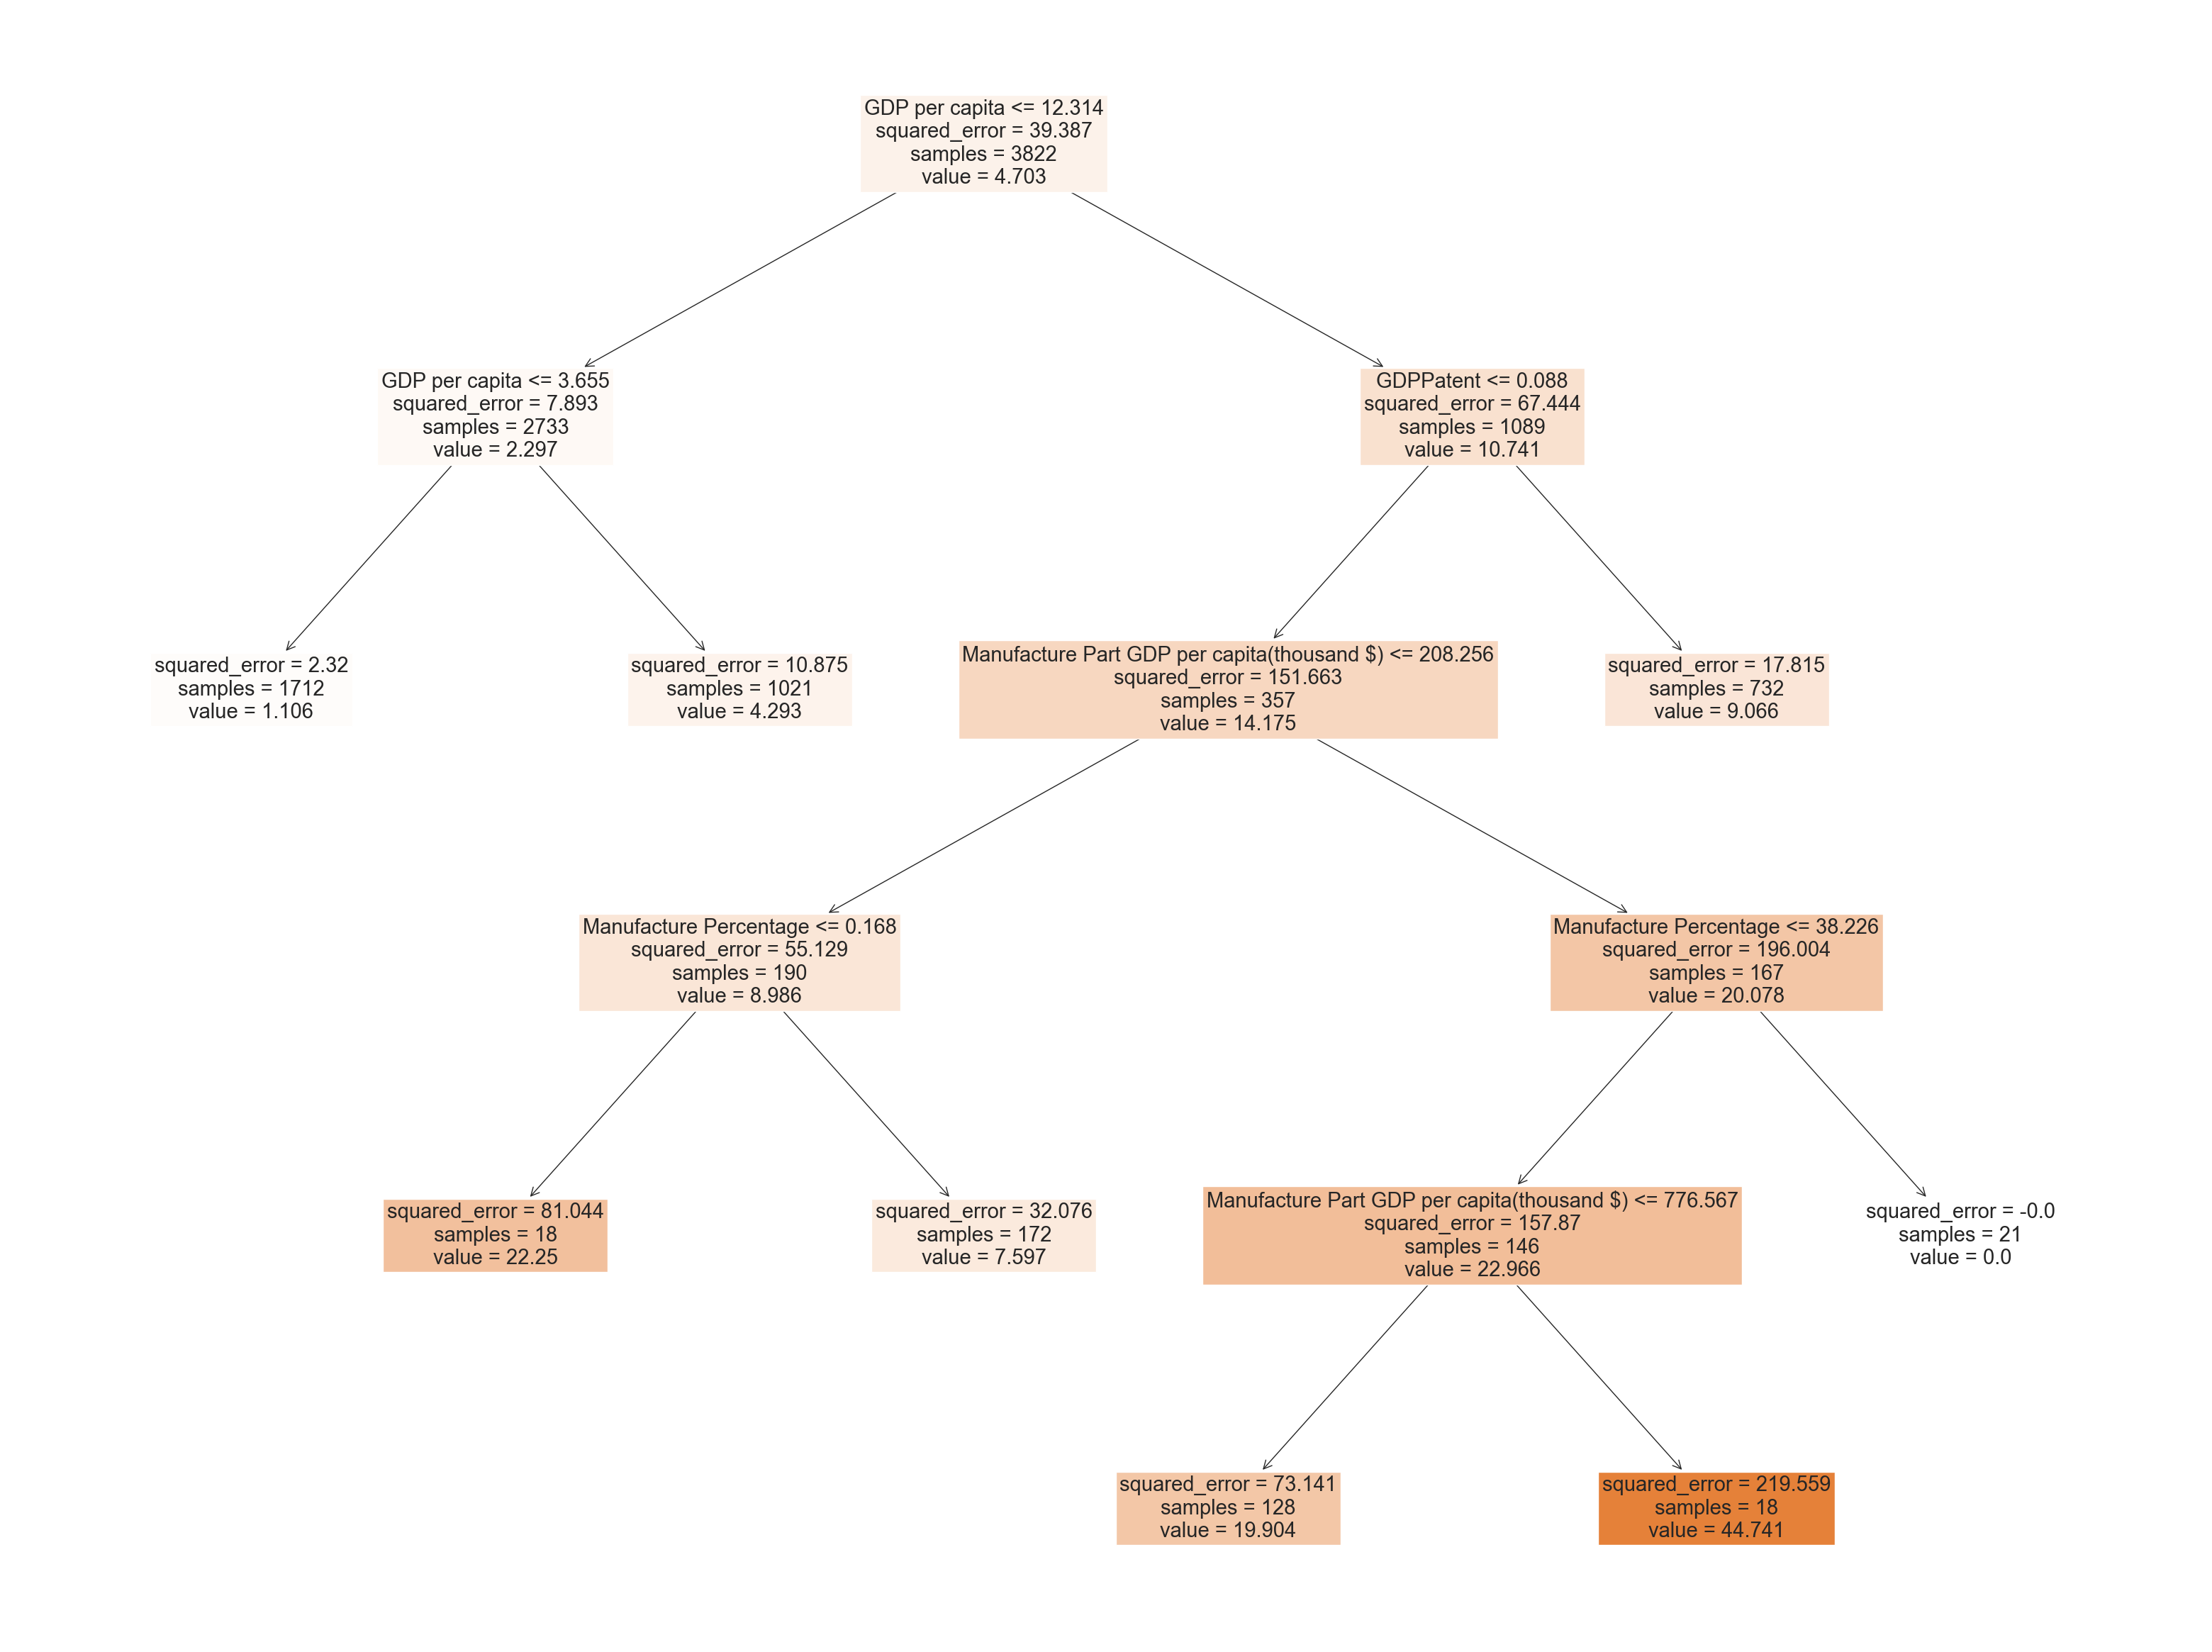

In [98]:
from sklearn import tree
sqft_tree = tree.DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, min_impurity_decrease=0.5).fit(X,y)
sqrf_fig = plt.figure(figsize=(40,30))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True, fontsize=21)

The initial split in the regression tree is determined by GDP per capita, a crucial indicator of a country's developmental stage. This categorization serves to differentiate countries based on their level of development.

For countries with a GDP per capita below 12,314 USD, typically indicative of developing or least developed nations, a subsequent split based on GDP per capita reveals further insights. The model estimates that least developed countries, with a GDP below 3,655 USD, are predicted to emit approximately 1.106 million tons of emissions per capita. Conversely, developing nations, with a GDP above $3,655, are expected to emit around 4.293 million tons per capita. These findings align with economic intuition and the initial hypothesis.

Developed countries, characterized by a GDP per capita exceeding $12,314, undergo further division based on GDPPatent, a product of GDP per capita and patent number. Countries with higher patent numbers exhibit an estimated emission per capita of 9.066 million tons, lower than the 14.175 million tons for their counterparts. This supports the initial hypothesis regarding the impact of technological advancement on emissions.

Subsequently, the group with fewer patents is subdivided based on manufacturing portion GDP per capita. Those with a higher manufacturing contribution are estimated to emit 20.078 million tons, whereas the lower group emits 8.986 million tons, consistent with expectations regarding the manufacturing industry's effect on emissions.

However, a contradictory finding arises when countries with less GDP generated in the manufacturing industry are further divided based on the manufacturing percentage. Here, countries with a manufacturing percentage less than 0.168% are estimated to emit 22.25 million tons per person, while those with higher percentage emit 7.597 million tons. Despite conflicting with the hypothesis, this discrepancy is likely due to the presence of outliers within the smaller subgroup.

Finally, countries with higher GDP generated in the manufacturing industry are divided based on the manufacturing percentage. For those with a percentage exceeding 38.226 percentage, comprising 21 samples likely from the same country, an emission estimation of 0 likely indicates data errors. Conversely, countries with a manufacturing percentage below 38.226 percentage are further classified based on manufacturing portion GDP per capita. Higher values emit 44.741 million tons per capita, while lower values emit 19.904 million tons, suggesting that economic development consistently drives emissions increases.

In [99]:
y_pred_tree = sqft_tree.predict(X)

from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

Mean Squared Error: 12.665157496380745


The mean squared error (MSE) of my regression tree stands at 12.67, a considerable value given the scale of my dataset.

Given that I rescaled the data by adjusting units or converting to per capita values, most actual numerical values fall below 30. Therefore, an MSE of 14.16 suggests a relatively large error. This could be attributed to the intricate interactions among variables and the presence of outliers, which may either represent unique cases or be indicative of missing critical data.


### Random Forest Model

Here, I've utilized a random forest model on my regression data and generated an importance matrix to ascertain the relative influence of each independent variable in the model.

In [100]:
regr_RF = RandomForestRegressor(max_features=8, random_state=1).fit(X, y)

pred = regr_RF.predict(X)

mean_squared_error(y, pred)

0.7436684192540274

The MSE obtained from the random forest model is 0.74, significantly lower than that of the regression tree model. This discrepancy suggests that the random forest model outperforms the regression tree model in generalizing to unseen data and capturing the underlying patterns within my dataset.

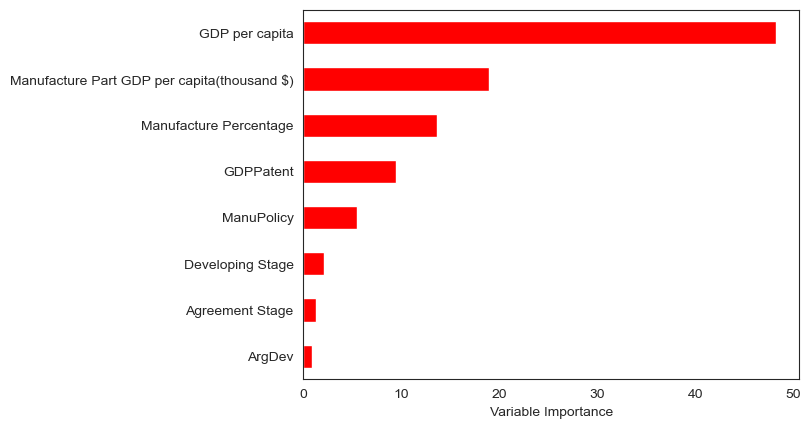

In [101]:
Importance = pd.DataFrame({'Importance':regr_RF.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Running an importance matrix reveals that GDP per capita accounts for approximately 50% of the overall importance in the model. Following this, variables such as manufacturing portion GDP per capita, manufacturing percentage, and GDPPatent rank next, occupying 20%, 15%, and 10% of the variance, respectively. The remaining variables collectively contribute to 5% of the overall importance.

This pattern indicates that the variables `Agreement Stage`, `Developing Stage`, and `AgrDev`, which are crucial in the difference-in-difference model, cannot be captured in the regression tree due to their insignificance. However, given the high significance of variables such as GDP per capita and others, I am unable to remove them from the model. Consequently, these three variables will remain insignificant.

### Comparing to Linear Regression

From the insights gleaned from the machine learning model, some align with the conclusions drawn from linear regressions, while others present surprising discoveries.

The significance of GDP per capita in determining emission levels, for instance, resonates with findings from the linear regression model. Similarly, the low importance of the difference-in-difference variables echoes previous observations, given their high p-values.

The OLS model is constructed on minimizing the total mean squared error without considering dividing the data into regions:

$$
\min \sum (\text{Emssion per capita}_i - \hat {Emission per capita}_i)^2
$$

By recursively partitioning the feature space based on the predictor variables, regression tree methods are capable of capturing the non-linear relationships and make more accurate predictions.

For example, upon examining regression models 6 and 7, which explore the relationship between manufacturing percentage and other variables, I discovered that this relationship is somewhat trivial. Despite initial skepticism, the importance matrix reveals that both manufacturing percentage and its interaction with GDP per capita hold considerable significance.

An intriguing revelation is the apparent insignificance of policy strictness. This may be attributed to the limited implementation of emission control policies worldwide. Only a handful of countries enforce such policies, yet they account for the majority of global CO2 emissions, which is why they need such policies. Consequently, the relationship between policy strictness and emissions may not be readily observable.

However, as numerous other factors influence emission levels, the three variables in the difference-in-difference model becomes insignificant within the regression tree model. As a result, they are not reflected in the regression tree, rendering it impossible to draw conclusions regarding the differences in the effectiveness of agreements across different types of countries. Additionally, since the control variables hold significant importance and cannot be omitted from the model, the regression tree proves to be unhelpful in my research.

# Conclusion

Commencing with the onset of the First Industrial Revolution in 1750, global emissions have demonstrated a consistent upward trend, characterized by a discernible acceleration in growth rates across successive periods. A recent paradigm shift has emerged, driven by heightened societal and governmental awareness of the adverse consequences of CO2 emissions on atmospheric composition.

In response to the imperative of reducing emission levels, countries have implemented the Kyoto Protocol and the Paris Agreement. Subsequent to the introduction of these policies, there has been a discernible decline in emission levels. However, it is imperative to discern the efficacy of these agreements and policies across different nations. I hypothesize that their effectiveness may be diminished in developing countries.

Drawing upon empirical evidence, graphical representations, map visualizations, and analytical insights, this hypothesis can be substantiated to a certain extent. Through careful analysis, I have identified several key observations:

- Developing countries typically exhibit lower absolute GDP per capita growth rates alongside a higher increase in emission levels.
- The effectiveness of transitioning to cleaner energy sources appears to be less pronounced in developing countries.
- Policies such as carbon taxes and emission trading systems may also exhibit reduced efficacy in these regions.

To substantiate my hypothesis empirically, I integrate supplementary variables including the proportion of manufacturing in GDP, the rigor of policy measures, the number of renewable energy related patents, and the developmental stage of countries. Subsequently, I perform a regression analysis using the difference-in-difference model. The coefficient associated with the difference-in-difference variable, indicating the disparity in emission changes among countries at different stages of development, yields a negative value. This finding confirms that more developed nations consistently demonstrate a more pronounced decrease in emissions subsequent to the enactment of global agreements, thus reinforcing my hypothesis.

Additionally, through the utilization of machine learning techniques, while conclusive outcomes pertaining to my primary research question remain elusive, I ascertain the substantial influence of the selected variables on emission levels.

**Limitations and Improvements**

While the research has successfully addressed my primary inquiry and validated my hypothesis, several limitations necessitate further improvements in future studies.

1. Insufficient controlling variables: The current study incorporates a limited number of controlling variables, only including GDP per capita, manufacturing percentage, patent number, and policy strictness. While these factors explain a portion of the variance in emission levels, the real-world dynamics are far more intricate. Future research efforts should aim to include additional controlling variables to provide a more comprehensive analysis.


2. Inadequate justification for variable interactions: The relationships between controlling variables often exhibit nonlinear correlations, each deserving a dedicated investigation. Although I have integrated findings from existing research, many of these relationships remain unexplored or unaccounted for in my regression model. Future studies should prioritize scrutinizing variable correlations to enhance the robustness of the analysis.


3. Data inaccuracies: Despite utilizing data from reputable sources such as the World Bank, inherent inaccuracies persist within the dataset. Moreover, the variable "policy strictness" in my research only encompasses carbon tax and emissions trading scheme (ETS) information, which may not fully capture the breadth of policy stringency. Addressing these data limitations will require more comprehensive efforts to estimate policy strictness accurately.


4. Challenges in training machine learning models: The study encounters difficulties in integrating the difference-in-difference model into machine learning analyses. A discrepancy arises between the significance of controlling variables and their representation in the regression tree, leading to an imbalance in split conditions. Future endeavors should prioritize gaining a deeper understanding of machine learning techniques and explore methods to rectify these issues.


# Reference

1. Kaggle. (n.d.). Global Fossil CO2 Emissions by Country (2002-2022) [Data set]. Retrieved from https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022

2. William F Lamb et al 2021, A review of trends and drivers of greenhouse gas emissions by sector from 1990 to 2018, Environ. Res. Lett. 16 073005

3. Raihan, A., Begum, R.A., Said, M.N.M. et al. Relationship between economic growth, renewable energy use, technological innovation, and carbon emission toward achieving Malaysia’s Paris agreement. Environ Syst Decis 42, 586–607 (2022). https://doi.org/10.1007/s10669-022-09848-0![image.png](attachment:image.png)

4. Söderholm, P., & Lundmark, R. (2003). Carbon taxes and CO2 emissions: Sweden as a case study. Energy Policy, 31(4), 373-384. https://doi.org/10.1016/S0301-4215(02)00155-2.

5. Mansoor, A., & Sultana, B. (2018). Impact of Population, GDP and Energy Consumption on Carbon Emissions: Evidence from Pakistan Using an Analytic Tool IPAT. Asian Journal of Economics and Empirical Research, 5(2), 183–190. https://doi.org/10.20448/journal.501.2018.52.183.190

6. Soytas, U., & Sari, R. (2003). Energy consumption and GDP: causality relationship in G-7 countries and emerging markets. Energy Economics, 25(1), 33-37. https://doi.org/10.1016/S0140-9883(02)00009-9.

7. Olivier J.G.J. and Peters J.A.H.W. (2020), Trends in global CO2 and total greenhouse gas emissions: 2020 report. PBL Netherlands Environmental Assessment Agency, The Hague

8. Zgrcemta. (n.d.). World GDP/GDP per capita and annual growths [Data set]. Kaggle. https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths

9. Center for Global Development. (2023).Carbon Pricing Retrieved from URL https://www.cgdev.org/cdi?gad_source=1&gclid=CjwKCAjwte-vBhBFEiwAQSv_xaYaTauWLpZo-DqkAoRMeD5kpv3kY6D89qnvRXrQ_V7Q4kHT2L5BHxoCCnIQAvD_BwE#/raw_environment/carbon_pricing/carbon_pricing?utm_source=google&utm_medium=cpc&utm_campaign=cdi_2023

10. Wikipedia contributors. (2024, April 2). List of countries by renewable electricity production. In Wikipedia. Retrieved  from URL https://en.wikipedia.org/wiki/List_of_countries_by_renewable_electricity_production

11. World Bank. (2024). Manufacturing, value added (% of GDP). Retrieved from World Bank Data API: https://api.worldbank.org/country/all/indicator/SP.POP.TOTL?source=2&downloadformat=csv

12. World Bank. (2024). Population, total. Retrieved from World Bank Data API: https://api.worldbank.org/country/all/indicator/NV.IND.MANF.ZS?source=2&downloadformat=csv

13. Our World in Data. (n.d.). Patents for Renewables by Country. Retrieved from https://ourworldindata.org/grapher/patents-for-renewables-by-country

14. Our World in Data. (n.d.). Carbon pricing. Retrieved from https://ourworldindata.org/carbon-pricing

15. Wikipedia contributors. (n.d.). Developed country. In Wikipedia. Retrieved from https://en.wikipedia.org/wiki/Developed_country#Human_Development_Index_(HDI)

16. Wikipedia contributors. (n.d.). Developing country. In Wikipedia. Retrieved from https://en.wikipedia.org/wiki/Developing_country#Country_lists